In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.decomposition import TruncatedSVD
import random
import seaborn as sns
import os.path as path
import os
import matplotlib
import matplotlib.font_manager
import matplotlib.pyplot as plt # graphs plotting
from Bio import SeqIO # some BioPython that will come in handy
#matplotlib inline
import numpy
import csv 

from matplotlib import rc

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn import svm

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

import pandas as pd
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler  
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import classification_report, confusion_matrix 

from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

from pandas import DataFrame

from sklearn.model_selection import KFold 
from sklearn.model_selection import RepeatedKFold

from sklearn.metrics import confusion_matrix

from numpy import mean


from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

import statistics

from sklearn.cluster import KMeans

from sklearn.datasets import load_digits
from sklearn.decomposition import KernelPCA

import math
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import confusion_matrix

from os import listdir
from os.path import isfile, join

import itertools 

# for Arial typefont
matplotlib.rcParams['font.family'] = 'Arial'


## for Palatino and other serif fonts use:
# rc('font',**{'family':'serif','serif':['Palatino']})
# matplotlib.rcParams['mathtext.fontset'] = 'cm'

## for LaTeX typefont
# matplotlib.rcParams['mathtext.fontset'] = 'stix'
# matplotlib.rcParams['font.family'] = 'STIXGeneral'

## for another LaTeX typefont
# rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})

# rc('text', usetex = True)

print("Packages imported")

Packages imported


In [73]:
application_name_tmp = "Instagram"

path = "E:/University/2nd Semester/IoT/Project/Data/IoT Sensor Data/" + application_name_tmp + "/Accelerometer/"

onlyfiles = [f for f in listdir(path) if isfile(join(path, f))]
onlyfiles

['User_1609_Gender_Female_Hand_Right Hand_Application_Instagram_Age__35_(Accelerometer).csv',
 'User_1660_Gender_Female_Hand_Right Hand_Application_Instagram_Age__35_(Accelerometer).csv',
 'User_1786_Gender_Male_Hand_Right Hand_Application_Instagram_Age_20-25_(Accelerometer).csv',
 'User_1808_Gender_Female_Hand_Left Hand_Application_Instagram_Age__35_(Accelerometer).csv',
 'User_2347_Gender_Female_Hand_Both Hands_Application_Instagram_Age_25-30_(Accelerometer).csv',
 'User_3556_Gender_Female_Hand_Both Hands_Application_Instagram_Age__35_(Accelerometer).csv',
 'User_3644_Gender_Female_Hand_Right Hand_Application_Instagram_Age_30-35_(Accelerometer).csv',
 'User_3737_Gender_Male_Hand_Right Hand_Application_Instagram_Age_25-30_(Accelerometer).csv',
 'User_3884_Gender_Female_Hand_Left Hand_Application_Instagram_Age_30-35_(Accelerometer).csv',
 'User_4347_Gender_Male_Hand_Right Hand_Application_Instagram_Age_30-35_(Accelerometer).csv',
 'User_4415_Gender_Female_Hand_Left Hand_Application_Ins

In [170]:
application_name_tmp = "Instagram"

path = "E:/University/2nd Semester/IoT/Project/Data/IoT Sensor Data/" + application_name_tmp + "/Accelerometer/"

onlyfiles = [f for f in listdir(path) if isfile(join(path, f))]

Accelerometer_final_feature_set = []

x_values_plot = []
y_values_plot = []
z_values_plot = []
for i in range(len(onlyfiles)):
#     print(i,"/",len(onlyfiles))
    file_name_tmp = onlyfiles[i]
    x_values = []
    y_values = []
    z_values = []
    with open(path + file_name_tmp) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        for row in csv_reader:
            tmp = row
            x_values.append(float(tmp[1]))
            y_values.append(float(tmp[2]))
            z_values.append(float(tmp[3]))

    x_features = [mean(x_values),statistics.median(x_values),statistics.mode(x_values),statistics.quantiles(x_values)[0],statistics.quantiles(x_values)[1], statistics.quantiles(x_values)[2],statistics.pstdev(x_values),statistics.stdev(x_values),statistics.variance(x_values)]
    y_features = [mean(y_values),statistics.median(y_values),statistics.mode(y_values),statistics.quantiles(y_values)[0],statistics.quantiles(y_values)[1], statistics.quantiles(y_values)[2],statistics.pstdev(y_values),statistics.stdev(y_values),statistics.variance(y_values)]
    z_features = [mean(z_values),statistics.median(z_values),statistics.mode(z_values),statistics.quantiles(z_values)[0],statistics.quantiles(z_values)[1], statistics.quantiles(z_values)[2],statistics.pstdev(z_values),statistics.stdev(z_values),statistics.variance(z_values)]

    Accelerometer_final_feature_set.append(list(itertools.chain(x_features,y_features,z_features)))
    
    x_values_plot.append(np.array(x_values))
    y_values_plot.append(np.array(y_values))
    z_values_plot.append(np.array(z_values))

In [136]:
x_mean = pd.DataFrame(x_values_plot)
y_mean = pd.DataFrame(y_values_plot)
z_mean = pd.DataFrame(z_values_plot)

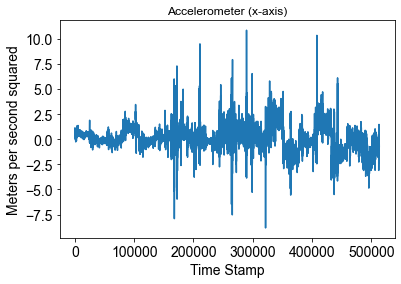

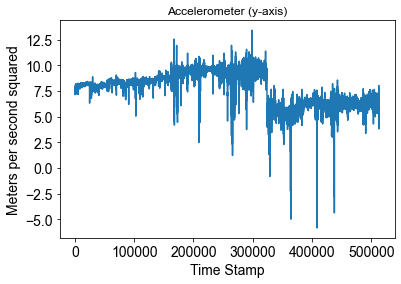

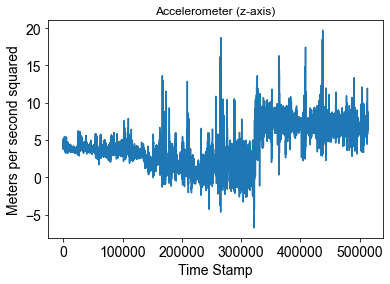

In [137]:
plt.plot(x_mean.mean(axis=0))
plt.ylabel('Meters per second squared',fontsize=14)
plt.xlabel('Time Stamp',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("Accelerometer (x-axis)")
plt.show()

plt.plot(y_mean.mean(axis=0))
plt.ylabel('Meters per second squared',fontsize=14)
plt.xlabel('Time Stamp',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("Accelerometer (y-axis)")
plt.show()

plt.plot(z_mean.mean(axis=0))
plt.ylabel('Meters per second squared',fontsize=14)
plt.xlabel('Time Stamp',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("Accelerometer (z-axis)")
plt.show()

In [171]:


path = "E:/University/2nd Semester/IoT/Project/Data/IoT Sensor Data/" + application_name_tmp + "/Gyroscope/"

onlyfiles = [f for f in listdir(path) if isfile(join(path, f))]

Gyroscope_final_feature_set = []

x_values_plot = []
y_values_plot = []
z_values_plot = []

for i in range(len(onlyfiles)):
#     print(i,"/",len(onlyfiles))
    file_name_tmp = onlyfiles[i]
    x_values = []
    y_values = []
    z_values = []
    with open(path + file_name_tmp) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        for row in csv_reader:
            tmp = row
            x_values.append(float(tmp[1]))
            y_values.append(float(tmp[2]))
            z_values.append(float(tmp[3]))

    x_features = [mean(x_values),statistics.median(x_values),statistics.mode(x_values),statistics.quantiles(x_values)[0],statistics.quantiles(x_values)[1], statistics.quantiles(x_values)[2],statistics.pstdev(x_values),statistics.stdev(x_values),statistics.variance(x_values)]
    y_features = [mean(y_values),statistics.median(y_values),statistics.mode(y_values),statistics.quantiles(y_values)[0],statistics.quantiles(y_values)[1], statistics.quantiles(y_values)[2],statistics.pstdev(y_values),statistics.stdev(y_values),statistics.variance(y_values)]
    z_features = [mean(z_values),statistics.median(z_values),statistics.mode(z_values),statistics.quantiles(z_values)[0],statistics.quantiles(z_values)[1], statistics.quantiles(z_values)[2],statistics.pstdev(z_values),statistics.stdev(z_values),statistics.variance(z_values)]

    Gyroscope_final_feature_set.append(list(itertools.chain(x_features,y_features,z_features)))
    
    x_values_plot.append(np.array(x_values))
    y_values_plot.append(np.array(y_values))
    z_values_plot.append(np.array(z_values))

In [139]:
x_mean = pd.DataFrame(x_values_plot)
y_mean = pd.DataFrame(y_values_plot)
z_mean = pd.DataFrame(z_values_plot)

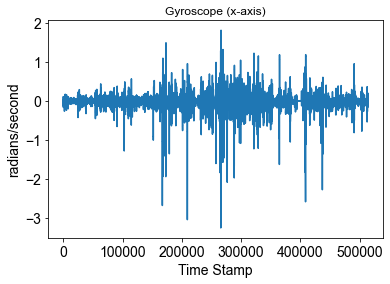

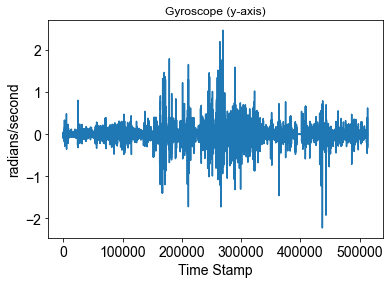

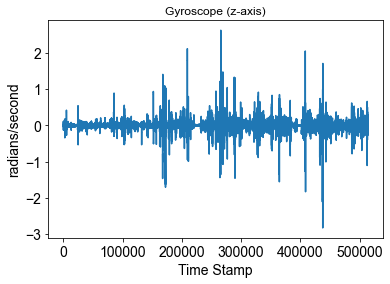

In [140]:
plt.plot(x_mean.mean(axis=0))
plt.ylabel('radians/second',fontsize=14)
plt.xlabel('Time Stamp',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("Gyroscope (x-axis)")
plt.show()

plt.plot(y_mean.mean(axis=0))
plt.ylabel('radians/second',fontsize=14)
plt.xlabel('Time Stamp',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("Gyroscope (y-axis)")
plt.show()

plt.plot(z_mean.mean(axis=0))
plt.ylabel('radians/second',fontsize=14)
plt.xlabel('Time Stamp',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("Gyroscope (z-axis)")
plt.show()

In [141]:


path = "E:/University/2nd Semester/IoT/Project/Data/IoT Sensor Data/" + application_name_tmp + "/Magnetic/"

onlyfiles = [f for f in listdir(path) if isfile(join(path, f))]

Magnetic_final_feature_set = []

x_values_plot = []
y_values_plot = []
z_values_plot = []

for i in range(len(onlyfiles)):
#     print(i,"/",len(onlyfiles))
    file_name_tmp = onlyfiles[i]
    x_values = []
    y_values = []
    z_values = []
    with open(path + file_name_tmp) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        for row in csv_reader:
            tmp = row
            x_values.append(float(tmp[1]))
            y_values.append(float(tmp[2]))
            z_values.append(float(tmp[3]))

    x_features = [mean(x_values),statistics.median(x_values),statistics.mode(x_values),statistics.quantiles(x_values)[0],statistics.quantiles(x_values)[1], statistics.quantiles(x_values)[2],statistics.pstdev(x_values),statistics.stdev(x_values),statistics.variance(x_values)]
    y_features = [mean(y_values),statistics.median(y_values),statistics.mode(y_values),statistics.quantiles(y_values)[0],statistics.quantiles(y_values)[1], statistics.quantiles(y_values)[2],statistics.pstdev(y_values),statistics.stdev(y_values),statistics.variance(y_values)]
    z_features = [mean(z_values),statistics.median(z_values),statistics.mode(z_values),statistics.quantiles(z_values)[0],statistics.quantiles(z_values)[1], statistics.quantiles(z_values)[2],statistics.pstdev(z_values),statistics.stdev(z_values),statistics.variance(z_values)]

    Magnetic_final_feature_set.append(list(itertools.chain(x_features,y_features,z_features)))
    
    x_values_plot.append(np.array(x_values))
    y_values_plot.append(np.array(y_values))
    z_values_plot.append(np.array(z_values))

In [142]:
x_mean = pd.DataFrame(x_values_plot)
y_mean = pd.DataFrame(y_values_plot)
z_mean = pd.DataFrame(z_values_plot)

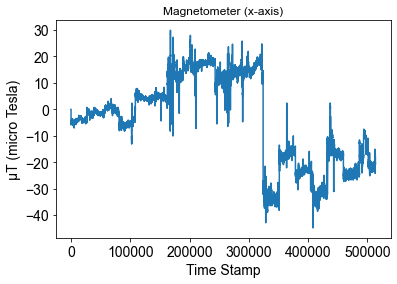

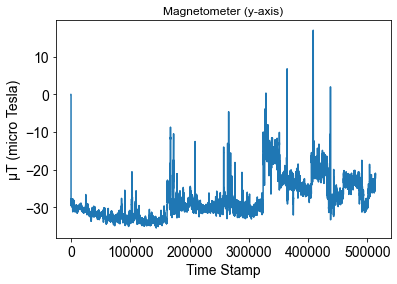

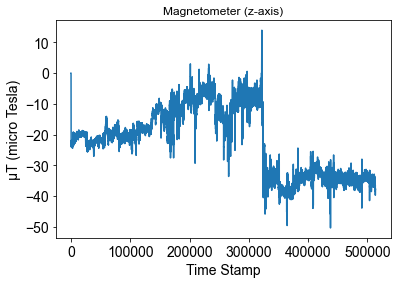

In [144]:
plt.plot(x_mean.mean(axis=0))
plt.ylabel('μT (micro Tesla)',fontsize=14)
plt.xlabel('Time Stamp',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("Magnetometer (x-axis)")
plt.show()

plt.plot(y_mean.mean(axis=0))
plt.ylabel('μT (micro Tesla)',fontsize=14)
plt.xlabel('Time Stamp',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("Magnetometer (y-axis)")
plt.show()

plt.plot(z_mean.mean(axis=0))
plt.ylabel('μT (micro Tesla)',fontsize=14)
plt.xlabel('Time Stamp',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("Magnetometer (z-axis)")
plt.show()

In [136]:
gender = []
hand = []
Application = []
Age = []

for i in range(len(onlyfiles)):
    gender.append(onlyfiles[i].split("_")[3])
    hand.append(onlyfiles[i].split("_")[5])
    Application.append(onlyfiles[i].split("_")[7])
    Age.append(onlyfiles[i].split("_")[9])



In [137]:
final_tmp_data = []
for j in range(len(onlyfiles)):
    final_write_features = list(itertools.chain(Accelerometer_final_feature_set[j],Gyroscope_final_feature_set[j],Magnetic_final_feature_set[j]))
    final_tmp_data.append(final_write_features)

In [138]:
len(final_tmp_data),len(final_tmp_data[0])

(27, 81)

In [139]:
final_path = "E:/University/2nd Semester/IoT/Project/Data/IoT Sensor Data/" + application_name_tmp + "/final_" + application_name_tmp + "_data.csv"
with open(final_path, 'w', newline='') as file:
    writer = csv.writer(file)
    for i in range(0,len(final_tmp_data)):
        ccv = final_tmp_data[i]
        writer.writerow(ccv)

In [140]:
final_tmp_attr_data = []
for j in range(len(onlyfiles)):
    final_tmp_attr_data.append([(gender[j]),hand[j],Application[j],Age[j]])

In [2]:
# Age

In [141]:
final_path = "E:/University/2nd Semester/IoT/Project/Data/IoT Sensor Data/" + application_name_tmp + "/final_" + application_name_tmp + "_attributes.csv"
with open(final_path, 'w', newline='') as file:
    writer = csv.writer(file)
    for i in range(0,len(final_tmp_attr_data)):
        ccv = final_tmp_attr_data[i]
        writer.writerow(ccv)

# Classification Functions

In [3]:
# In[4]
def roc_auc_score_multiclass(actual_class, pred_class, average = "macro"):

    unique_class = set(actual_class)
    roc_auc_dict = {}
    for per_class in unique_class:
        #creating a list of all the classes except the current class 
        other_class = [x for x in unique_class if x != per_class]

        #marking the current class as 1 and all other classes as 0
        new_actual_class = [0 if x in other_class else 1 for x in actual_class]
        new_pred_class = [0 if x in other_class else 1 for x in pred_class]

        #using the sklearn metrics method to calculate the roc_auc_score
        roc_auc = roc_auc_score(new_actual_class, new_pred_class, average = average)
        roc_auc_dict[per_class] = roc_auc
    
    
    check = pd.DataFrame(roc_auc_dict.items())
    return mean(check)

def svm_fun_kernel(X_train,y_train,X_test,y_test,kernel_mat):

#     clf = svm.SVC()
    clf = svm.SVC(kernel=kernel_mat)
    
    #Train the model using the training sets
    clf.fit(kernel_mat, y_train)

    #Predict the response for test dataset
    y_pred = clf.predict(X_test)
    
    svm_acc = metrics.accuracy_score(y_test, y_pred)
#     print("SVM Accuracy:",svm_acc)
    
    svm_prec = metrics.precision_score(y_test, y_pred,average='weighted')
#     print("SVM Precision:",svm_prec)
    
    svm_recall = metrics.recall_score(y_test, y_pred,average='weighted')
#     print("SVM Recall:",svm_recall)

    svm_f1_weighted = metrics.f1_score(y_test, y_pred,average='weighted')
#     print("SVM F1 Weighted:",svm_f1_weighted)
    
    svm_f1_macro = metrics.f1_score(y_test, y_pred,average='macro')
#     print("SVM F1 macro:",svm_f1_macro)
    
    svm_f1_micro = metrics.f1_score(y_test, y_pred,average='micro')
#     print("SVM F1 micro:",svm_f1_micro)
    
    confuse = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix SVM : \n", confuse)
    print("SVM Kernel Class Wise Accuracy : ",confuse.diagonal()/confuse.sum(axis=1))
    ######################## Compute ROC curve and ROC area for each class ################
    y_prob = y_pred
    macro_roc_auc_ovo = roc_auc_score_multiclass(y_test, y_prob, average='macro')
#    print(macro_roc_auc_ovo[1])
    check = [svm_acc,svm_prec,svm_recall,svm_f1_weighted,svm_f1_macro,svm_f1_micro,macro_roc_auc_ovo[1]]
    return(check)
    
# In[5]
##########################  SVM Classifier  ################################
def svm_fun(X_train,y_train,X_test,y_test):
    #Create a svm Classifier
    clf = svm.SVC(kernel='linear') # Linear Kernel

    #Train the model using the training sets
    clf.fit(X_train, y_train)

    #Predict the response for test dataset
    y_pred = clf.predict(X_test)
    
    svm_acc = metrics.accuracy_score(y_test, y_pred)
#     print("SVM Accuracy:",svm_acc)
    
    svm_prec = metrics.precision_score(y_test, y_pred,average='weighted')
#     print("SVM Precision:",svm_prec)
    
    svm_recall = metrics.recall_score(y_test, y_pred,average='weighted')
#     print("SVM Recall:",svm_recall)

    svm_f1_weighted = metrics.f1_score(y_test, y_pred,average='weighted')
#     print("SVM F1 Weighted:",svm_f1_weighted)
    
    svm_f1_macro = metrics.f1_score(y_test, y_pred,average='macro')
#     print("SVM F1 macro:",svm_f1_macro)
    
    svm_f1_micro = metrics.f1_score(y_test, y_pred,average='micro')
#     print("SVM F1 micro:",svm_f1_micro)
    
    confuse = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix SVM : \n", confuse)
    print("SVM Class Wise Accuracy : ",confuse.diagonal()/confuse.sum(axis=1))
    ######################## Compute ROC curve and ROC area for each class ################
    y_prob = y_pred
    macro_roc_auc_ovo = roc_auc_score_multiclass(y_test, y_prob, average='macro')
#    print(macro_roc_auc_ovo[1])
    check = [svm_acc,svm_prec,svm_recall,svm_f1_weighted,svm_f1_macro,svm_f1_micro,macro_roc_auc_ovo[1]]
    return(check)
    


# In[5]
##########################  NB Classifier  ################################
def gaus_nb_fun(X_train,y_train,X_test,y_test):
    gnb = GaussianNB()
    y_pred = gnb.fit(X_train, y_train).predict(X_test)


    NB_acc = metrics.accuracy_score(y_test, y_pred)
#     print("Gaussian NB Accuracy:",NB_acc)

    NB_prec = metrics.precision_score(y_test, y_pred,average='weighted')
#     print("Gaussian NB Precision:",NB_prec)
    
    NB_recall = metrics.recall_score(y_test, y_pred,average='weighted')
#     print("Gaussian NB Recall:",NB_recall)
    
    NB_f1_weighted = metrics.f1_score(y_test, y_pred,average='weighted')
#     print("Gaussian NB F1 weighted:",NB_f1_weighted)
    
    NB_f1_macro = metrics.f1_score(y_test, y_pred,average='macro')
#     print("Gaussian NB F1 macro:",NB_f1_macro)
    
    NB_f1_micro = metrics.f1_score(y_test, y_pred,average='micro')
#     print("Gaussian NB F1 micro:",NB_f1_micro)
    
    confuse = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix NB : \n", confuse)
    print("NB Class Wise Accuracy : ",confuse.diagonal()/confuse.sum(axis=1))
    ######################## Compute ROC curve and ROC area for each class ################
    y_prob = y_pred
    macro_roc_auc_ovo = roc_auc_score_multiclass(y_test, y_prob, average='macro')
    check = [NB_acc,NB_prec,NB_recall,NB_f1_weighted,NB_f1_macro,NB_f1_micro,macro_roc_auc_ovo[1]]
    return(check)

# In[5]
##########################  MLP Classifier  ################################
def mlp_fun(X_train,y_train,X_test,y_test):
    # Feature scaling
    scaler = StandardScaler()  
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)  
    X_test_2 = scaler.transform(X_test)


    # Finally for the MLP- Multilayer Perceptron
    mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)  
    mlp.fit(X_train, y_train)


    y_pred = mlp.predict(X_test_2)
    
    MLP_acc = metrics.accuracy_score(y_test, y_pred)
#     print("MLP Accuracy:",MLP_acc)
    
    MLP_prec = metrics.precision_score(y_test, y_pred,average='weighted')
#     print("MLP Precision:",MLP_prec)
    
    MLP_recall = metrics.recall_score(y_test, y_pred,average='weighted')
#     print("MLP Recall:",MLP_recall)
    
    MLP_f1_weighted = metrics.f1_score(y_test, y_pred,average='weighted')
#     print("MLP F1:",MLP_f1_weighted)
    
    MLP_f1_macro = metrics.f1_score(y_test, y_pred,average='macro')
#     print("MLP F1:",MLP_f1_macro)
    
    MLP_f1_micro = metrics.f1_score(y_test, y_pred,average='micro')
#     print("MLP F1:",MLP_f1_micro)
    
    confuse = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix MLP : \n", confuse)
    print("MLP Class Wise Accuracy : ",confuse.diagonal()/confuse.sum(axis=1))
    ######################## Compute ROC curve and ROC area for each class ################
    y_prob = y_pred
    macro_roc_auc_ovo = roc_auc_score_multiclass(y_test, y_prob, average='macro')
    
    check = [MLP_acc,MLP_prec,MLP_recall,MLP_f1_weighted,MLP_f1_macro,MLP_f1_micro,macro_roc_auc_ovo[1]]
    return(check)

# In[5]
##########################  knn Classifier  ################################
def knn_fun(X_train,y_train,X_test,y_test):
    classifier = KNeighborsClassifier(n_neighbors=5)
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)

    knn_acc = metrics.accuracy_score(y_test, y_pred)
#     print("Knn Accuracy:",knn_acc)
    
    knn_prec = metrics.precision_score(y_test, y_pred,average='weighted')
#     print("Knn Precision:",knn_prec)
    
    knn_recall = metrics.recall_score(y_test, y_pred,average='weighted')
#     print("Knn Recall:",knn_recall)
    
    knn_f1_weighted = metrics.f1_score(y_test, y_pred,average='weighted')
#     print("Knn F1 weighted:",knn_f1_weighted)
    
    knn_f1_macro = metrics.f1_score(y_test, y_pred,average='macro')
#     print("Knn F1 macro:",knn_f1_macro)
    
    knn_f1_micro = metrics.f1_score(y_test, y_pred,average='micro')
#     print("Knn F1 micro:",knn_f1_micro)
    
    confuse = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix KNN : \n", confuse)
    print("KNN Class Wise Accuracy : ",confuse.diagonal()/confuse.sum(axis=1))
    ######################## Compute ROC curve and ROC area for each class ################
    y_prob = y_pred
    macro_roc_auc_ovo = roc_auc_score_multiclass(y_test, y_prob, average='macro')
    
    check = [knn_acc,knn_prec,knn_recall,knn_f1_weighted,knn_f1_macro,knn_f1_micro,macro_roc_auc_ovo[1]]
    return(check)

# In[5]
##########################  Random Forest Classifier  ################################
def rf_fun(X_train,y_train,X_test,y_test):
    # Import the model we are using
    from sklearn.ensemble import RandomForestClassifier
    # Instantiate model with 1000 decision trees
    rf = RandomForestClassifier(n_estimators = 100)
    # Train the model on training data
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)

    fr_acc = metrics.accuracy_score(y_test, y_pred)
#     print("Random Forest Accuracy:",fr_acc)
    
    fr_prec = metrics.precision_score(y_test, y_pred,average='weighted')
#     print("Random Forest Precision:",fr_prec)
    
    fr_recall = metrics.recall_score(y_test, y_pred,average='weighted')
#     print("Random Forest Recall:",fr_recall)
    
    fr_f1_weighted = metrics.f1_score(y_test, y_pred,average='weighted')
#     print("Random Forest F1 weighted:",fr_f1_weighted)
    
    fr_f1_macro = metrics.f1_score(y_test, y_pred,average='macro')
#     print("Random Forest F1 macro:",fr_f1_macro)
    
    fr_f1_micro = metrics.f1_score(y_test, y_pred,average='micro')
#     print("Random Forest F1 micro:",fr_f1_micro)
    
    confuse = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix RF : \n", confuse)
    print("RF Class Wise Accuracy : ",confuse.diagonal()/confuse.sum(axis=1))
    ######################## Compute ROC curve and ROC area for each class ################
    y_prob = y_pred
    macro_roc_auc_ovo = roc_auc_score_multiclass(y_test, y_prob, average='macro')
    
    check = [fr_acc,fr_prec,fr_recall,fr_f1_weighted,fr_f1_macro,fr_f1_micro,macro_roc_auc_ovo[1]]
    return(check)

# In[5]
    ##########################  Logistic Regression Classifier  ################################
def lr_fun(X_train,y_train,X_test,y_test):

    model = LogisticRegression(solver='liblinear', random_state=0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    LR_acc = metrics.accuracy_score(y_test, y_pred)
#     print("Logistic Regression Accuracy:",LR_acc)
    
    LR_prec = metrics.precision_score(y_test, y_pred,average='weighted')
#     print("Logistic Regression Precision:",LR_prec)
    
    LR_recall = metrics.recall_score(y_test, y_pred,average='weighted')
#     print("Logistic Regression Recall:",LR_recall)
    
    LR_f1_weighted = metrics.f1_score(y_test, y_pred,average='weighted')
#     print("Logistic Regression F1 weighted:",LR_f1_weighted)
    
    LR_f1_macro = metrics.f1_score(y_test, y_pred,average='macro')
#     print("Logistic Regression F1 macro:",LR_f1_macro)
    
    LR_f1_micro = metrics.f1_score(y_test, y_pred,average='micro')
#     print("Logistic Regression F1 micro:",LR_f1_micro)
    
    confuse = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix LR : \n", confuse)
    print("LR Class Wise Accuracy : ",confuse.diagonal()/confuse.sum(axis=1))
    ######################## Compute ROC curve and ROC area for each class ################
    y_prob = y_pred
    macro_roc_auc_ovo = roc_auc_score_multiclass(y_test, y_prob, average='macro')
    
    check = [LR_acc,LR_prec,LR_recall,LR_f1_weighted,LR_f1_macro,LR_f1_micro,macro_roc_auc_ovo[1]]
    return(check)


def fun_decision_tree(X_train,y_train,X_test,y_test):
    from sklearn import tree
    
    clf = tree.DecisionTreeClassifier()    
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    dt_acc = metrics.accuracy_score(y_test, y_pred)
#     print("Logistic Regression Accuracy:",LR_acc)
    
    dt_prec = metrics.precision_score(y_test, y_pred,average='weighted')
#     print("Logistic Regression Precision:",LR_prec)
    
    dt_recall = metrics.recall_score(y_test, y_pred,average='weighted')
#     print("Logistic Regression Recall:",LR_recall)
    
    dt_f1_weighted = metrics.f1_score(y_test, y_pred,average='weighted')
#     print("Logistic Regression F1 weighted:",LR_f1_weighted)
    
    dt_f1_macro = metrics.f1_score(y_test, y_pred,average='macro')
#     print("Logistic Regression F1 macro:",LR_f1_macro)
    
    dt_f1_micro = metrics.f1_score(y_test, y_pred,average='micro')
#     print("Logistic Regression F1 micro:",LR_f1_micro)
    
    confuse = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix DT : \n", confuse)
    print("DT Class Wise Accuracy : ",confuse.diagonal()/confuse.sum(axis=1))
    ######################## Compute ROC curve and ROC area for each class ################
    y_prob = y_pred
    macro_roc_auc_ovo = roc_auc_score_multiclass(y_test, y_prob, average='macro')
    
    check = [dt_acc,dt_prec,dt_recall,dt_f1_weighted,dt_f1_macro,dt_f1_micro,macro_roc_auc_ovo[1]]
    return(check)


# Reading the Data

In [14]:
path_tmp = "E:/University/2nd Semester/IoT/Project/Data/IoT Sensor Data/org_only_features.csv"

features_data = []
with open(path_tmp) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        tmp = row
        temp_lst = []
        for u in range(len(tmp)):
            temp_lst.append(float(tmp[u]))
        features_data.append(temp_lst)

In [22]:
path_tmp = "E:/University/2nd Semester/IoT/Project/Data/IoT Sensor Data/org_only_attributes.csv"

gender_data = []
hand_data = []
application_data = []
age_data = []
with open(path_tmp) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        tmp = row
        gender_data.append(tmp[0])
        hand_data.append(tmp[1])
        application_data.append(tmp[2])
        age_data.append(tmp[3])
        
int_gender = []
unique_varaints = list(np.unique(gender_data))
for ind_unique in range(len(gender_data)):
    variant_tmp = gender_data[ind_unique]
    ind_tmp = unique_varaints.index(variant_tmp)
    int_gender.append(ind_tmp)
    
int_hand = []
unique_varaints = list(np.unique(hand_data))
for ind_unique in range(len(hand_data)):
    variant_tmp = hand_data[ind_unique]
    ind_tmp = unique_varaints.index(variant_tmp)
    int_hand.append(ind_tmp)
    
int_application = []
unique_varaints = list(np.unique(application_data))
for ind_unique in range(len(application_data)):
    variant_tmp = application_data[ind_unique]
    ind_tmp = unique_varaints.index(variant_tmp)
    int_application.append(ind_tmp)
    
int_age = []
unique_varaints = list(np.unique(age_data))
for ind_unique in range(len(age_data)):
    variant_tmp = age_data[ind_unique]
    ind_tmp = unique_varaints.index(variant_tmp)
    int_age.append(ind_tmp)

In [60]:
X = np.array(features_data)
y = np.array(int_age)

In [61]:
# print("Accuracy   Precision   Recall   F1 (weighted)   F1 (Macro)   F1 (Micro)   ROC AUC")
svm_table = []
gauu_nb_table = []
mlp_table = []
knn_table = []
rf_table = []
lr_table = []
dt_table = []


from sklearn.model_selection import ShuffleSplit # or StratifiedShuffleSplit
import timeit


# sss = ShuffleSplit(n_splits=10, test_size=0.3)
# sss.get_n_splits(X, y)

# for train_index, test_index in sss.split(X, y):
# # train_index, test_index = next(sss.split(X, y)) 

#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index]

In [62]:
sss = ShuffleSplit(n_splits=100, test_size=0.3)
sss.get_n_splits(X, y)

for train_index, test_index in sss.split(X, y):
# train_index, test_index = next(sss.split(X, y)) 

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    start = timeit.default_timer()
    gauu_nb_return = gaus_nb_fun(X_train,y_train,X_test,y_test)
    stop = timeit.default_timer()
    print("NB Time : ", stop - start) 

    start = timeit.default_timer()
    mlp_return = mlp_fun(X_train,y_train,X_test,y_test)
    stop = timeit.default_timer()
    print("MLP Time : ", stop - start) 

    start = timeit.default_timer()
    knn_return = knn_fun(X_train,y_train,X_test,y_test)
    stop = timeit.default_timer()
    print("KNN Time : ", stop - start) 

    start = timeit.default_timer()
    rf_return = rf_fun(X_train,y_train,X_test,y_test)
    stop = timeit.default_timer()
    print("RF Time : ", stop - start) 

    start = timeit.default_timer()
    lr_return = lr_fun(X_train,y_train,X_test,y_test)
    stop = timeit.default_timer()
    print("LR Time : ", stop - start) 

    start = timeit.default_timer()
    dt_return = fun_decision_tree(X_train,y_train,X_test,y_test)
    stop = timeit.default_timer()
    print("DT Time : ", stop - start) 

    start = timeit.default_timer()
    svm_return = svm_fun(X_train,y_train,X_test,y_test)
    stop = timeit.default_timer()
    print("SVM Time : ", stop - start) 

    gauu_nb_table.append(gauu_nb_return)
    mlp_table.append(mlp_return)
    knn_table.append(knn_return)
    rf_table.append(rf_return)
    lr_table.append(lr_return)
    dt_table.append(dt_return)
    svm_table.append(svm_return)

    svm_table_final = DataFrame(svm_table, columns=["Accuracy","Precision","Recall",
                                                    "F1 (weighted)","F1 (Macro)","F1 (Micro)","ROC AUC"])
    gauu_nb_table_final = DataFrame(gauu_nb_table, columns=["Accuracy","Precision","Recall",
                                                    "F1 (weighted)","F1 (Macro)","F1 (Micro)","ROC AUC"])
    mlp_table_final = DataFrame(mlp_table, columns=["Accuracy","Precision","Recall",
                                                    "F1 (weighted)","F1 (Macro)","F1 (Micro)","ROC AUC"])
    knn_table_final = DataFrame(knn_table, columns=["Accuracy","Precision","Recall",
                                                    "F1 (weighted)","F1 (Macro)","F1 (Micro)","ROC AUC"])
    rf_table_final = DataFrame(rf_table, columns=["Accuracy","Precision","Recall",
                                                    "F1 (weighted)","F1 (Macro)","F1 (Micro)","ROC AUC"])
    lr_table_final = DataFrame(lr_table, columns=["Accuracy","Precision","Recall",
                                                    "F1 (weighted)","F1 (Macro)","F1 (Micro)","ROC AUC"])

    dt_table_final = DataFrame(dt_table, columns=["Accuracy","Precision","Recall",
                                                    "F1 (weighted)","F1 (Macro)","F1 (Micro)","ROC AUC"])


Confusion Matrix NB : 
 [[6 0 0 0 0]
 [1 7 0 0 0]
 [0 0 6 0 0]
 [0 0 0 4 0]
 [3 1 0 0 6]]
NB Class Wise Accuracy :  [1.    0.875 1.    1.    0.6  ]
NB Time :  0.014308900000287395
Confusion Matrix MLP : 
 [[6 0 0 0 0]
 [0 8 0 0 0]
 [0 0 6 0 0]
 [0 0 0 4 0]
 [0 1 0 0 9]]
MLP Class Wise Accuracy :  [1.  1.  1.  1.  0.9]
MLP Time :  0.24868560000004436
Confusion Matrix KNN : 
 [[6 0 0 0 0]
 [0 8 0 0 0]
 [0 0 6 0 0]
 [1 1 0 2 0]
 [0 0 1 0 9]]
KNN Class Wise Accuracy :  [1.  1.  1.  0.5 0.9]
KNN Time :  0.014061599999877217
Confusion Matrix RF : 
 [[ 6  0  0  0  0]
 [ 0  8  0  0  0]
 [ 0  0  6  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0 10]]
RF Class Wise Accuracy :  [1. 1. 1. 1. 1.]
RF Time :  0.13235589999976582
Confusion Matrix LR : 
 [[6 0 0 0 0]
 [0 8 0 0 0]
 [0 0 6 0 0]
 [0 1 0 3 0]
 [0 0 1 0 9]]
LR Class Wise Accuracy :  [1.   1.   1.   0.75 0.9 ]
LR Time :  0.013869599999907223
Confusion Matrix DT : 
 [[ 5  0  0  0  1]
 [ 0  8  0  0  0]
 [ 0  2  4  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0 1

C:\Users\sali85\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix NB : 
 [[8 0 0 0 1]
 [2 6 3 0 0]
 [0 0 8 0 0]
 [0 0 0 1 0]
 [3 0 0 0 2]]
NB Class Wise Accuracy :  [0.88888889 0.54545455 1.         1.         0.4       ]
NB Time :  0.008410999999796331
Confusion Matrix MLP : 
 [[7 0 0 2 0]
 [5 6 0 0 0]
 [0 0 8 0 0]
 [0 0 0 1 0]
 [0 0 0 0 5]]
MLP Class Wise Accuracy :  [0.77777778 0.54545455 1.         1.         1.        ]
MLP Time :  0.19009150000010777
Confusion Matrix KNN : 
 [[9 0 0 0 0]
 [4 7 0 0 0]
 [0 0 8 0 0]
 [0 0 0 1 0]
 [0 0 0 0 5]]
KNN Class Wise Accuracy :  [1.         0.63636364 1.         1.         1.        ]
KNN Time :  0.010765300000002753
Confusion Matrix RF : 
 [[8 0 0 0 1]
 [0 7 4 0 0]
 [0 0 8 0 0]
 [0 0 0 1 0]
 [1 0 0 0 4]]
RF Class Wise Accuracy :  [0.88888889 0.63636364 1.         1.         0.8       ]
RF Time :  0.11410000000023501
Confusion Matrix LR : 
 [[9 0 0 0 0]
 [5 6 0 0 0]
 [0 0 8 0 0]
 [0 0 0 1 0]
 [0 0 0 0 5]]
LR Class Wise Accuracy :  [1.         0.54545455 1.         1.         1.        ]
LR 

C:\Users\sali85\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix MLP : 
 [[5 0 0 0 0]
 [5 4 0 0 1]
 [0 0 7 1 0]
 [0 0 0 2 0]
 [2 0 0 0 7]]
MLP Class Wise Accuracy :  [1.         0.4        0.875      1.         0.77777778]
MLP Time :  0.3541590999998334
Confusion Matrix KNN : 
 [[5 0 0 0 0]
 [5 5 0 0 0]
 [0 1 7 0 0]
 [0 1 0 1 0]
 [0 0 2 0 7]]
KNN Class Wise Accuracy :  [1.         0.5        0.875      0.5        0.77777778]
KNN Time :  0.010397500000181026
Confusion Matrix RF : 
 [[5 0 0 0 0]
 [4 6 0 0 0]
 [0 0 8 0 0]
 [0 0 0 2 0]
 [0 1 0 0 8]]
RF Class Wise Accuracy :  [1.         0.6        1.         1.         0.88888889]
RF Time :  0.12936350000018138
Confusion Matrix LR : 
 [[5 0 0 0 0]
 [5 5 0 0 0]
 [0 0 7 0 1]
 [0 1 0 1 0]
 [1 0 1 0 7]]
LR Class Wise Accuracy :  [1.         0.5        0.875      0.5        0.77777778]
LR Time :  0.013654700000188313
Confusion Matrix DT : 
 [[ 4  1  0  0  0]
 [ 0 10  0  0  0]
 [ 0  1  6  0  1]
 [ 0  0  0  2  0]
 [ 1  2  0  0  6]]
DT Class Wise Accuracy :  [0.8        1.         0.75       1.

C:\Users\sali85\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


DT Time :  0.011953400000038528
Confusion Matrix SVM : 
 [[9 0 0 0 0]
 [0 6 0 0 0]
 [0 0 7 0 0]
 [0 1 0 2 0]
 [0 1 0 0 8]]
SVM Class Wise Accuracy :  [1.         1.         1.         0.66666667 0.88888889]
SVM Time :  0.015677299999879324
Confusion Matrix NB : 
 [[6 1 0 0 3]
 [6 5 0 0 0]
 [2 0 6 0 0]
 [0 0 0 1 1]
 [0 1 0 0 2]]
NB Class Wise Accuracy :  [0.6        0.45454545 0.75       0.5        0.66666667]
NB Time :  0.008582400000250345
Confusion Matrix MLP : 
 [[9 0 0 0 1]
 [3 8 0 0 0]
 [0 0 7 1 0]
 [0 0 0 2 0]
 [0 0 0 0 3]]
MLP Class Wise Accuracy :  [0.9        0.72727273 0.875      1.         1.        ]
MLP Time :  0.2747097000001304
Confusion Matrix KNN : 
 [[10  0  0  0  0]
 [ 5  6  0  0  0]
 [ 1  0  7  0  0]
 [ 0  1  0  1  0]
 [ 0  0  1  0  2]]
KNN Class Wise Accuracy :  [1.         0.54545455 0.875      0.5        0.66666667]
KNN Time :  0.0083345999996709
Confusion Matrix RF : 
 [[10  0  0  0  0]
 [ 0 11  0  0  0]
 [ 0  0  8  0  0]
 [ 0  0  0  2  0]
 [ 0  0  0  0  3]]
RF 

C:\Users\sali85\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix MLP : 
 [[8 0 0 0 0]
 [3 8 0 0 0]
 [0 0 8 1 0]
 [1 0 0 1 0]
 [0 0 0 0 4]]
MLP Class Wise Accuracy :  [1.         0.72727273 0.88888889 0.5        1.        ]
MLP Time :  0.24217929999986154
Confusion Matrix KNN : 
 [[8 0 0 0 0]
 [2 8 1 0 0]
 [1 0 8 0 0]
 [1 1 0 0 0]
 [0 0 1 0 3]]
KNN Class Wise Accuracy :  [1.         0.72727273 0.88888889 0.         0.75      ]
KNN Time :  0.008347299999968527
Confusion Matrix RF : 
 [[8 0 0 0 0]
 [0 8 2 0 1]
 [0 0 9 0 0]
 [1 0 0 0 1]
 [0 0 0 0 4]]
RF Class Wise Accuracy :  [1.         0.72727273 1.         0.         1.        ]
RF Time :  0.10633320000033564
Confusion Matrix LR : 
 [[8 0 0 0 0]
 [2 8 1 0 0]
 [0 0 9 0 0]
 [1 0 0 1 0]
 [1 0 0 0 3]]
LR Class Wise Accuracy :  [1.         0.72727273 1.         0.5        0.75      ]
LR Time :  0.0140307000001485
Confusion Matrix DT : 
 [[7 0 0 0 1]
 [0 8 3 0 0]
 [0 0 9 0 0]
 [0 0 0 1 1]
 [0 1 0 0 3]]
DT Class Wise Accuracy :  [0.875      0.72727273 1.         0.5        0.75      ]
DT Ti

C:\Users\sali85\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sali85\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix MLP : 
 [[9 0 0 0 0]
 [0 9 0 0 0]
 [0 0 6 0 0]
 [0 0 0 3 0]
 [0 1 0 0 6]]
MLP Class Wise Accuracy :  [1.         1.         1.         1.         0.85714286]
MLP Time :  0.22869940000009592
Confusion Matrix KNN : 
 [[9 0 0 0 0]
 [3 6 0 0 0]
 [0 0 6 0 0]
 [0 1 1 1 0]
 [0 1 0 0 6]]
KNN Class Wise Accuracy :  [1.         0.66666667 1.         0.33333333 0.85714286]
KNN Time :  0.008377999999993335
Confusion Matrix RF : 
 [[9 0 0 0 0]
 [0 9 0 0 0]
 [0 0 6 0 0]
 [0 0 1 2 0]
 [1 1 0 0 5]]
RF Class Wise Accuracy :  [1.         1.         1.         0.66666667 0.71428571]
RF Time :  0.10701289999997243
Confusion Matrix LR : 
 [[8 1 0 0 0]
 [1 8 0 0 0]
 [0 0 6 0 0]
 [0 1 0 2 0]
 [0 0 0 0 7]]
LR Class Wise Accuracy :  [0.88888889 0.88888889 1.         0.66666667 1.        ]
LR Time :  0.014206699999704142
Confusion Matrix DT : 
 [[9 0 0 0 0]
 [0 9 0 0 0]
 [0 0 6 0 0]
 [0 0 1 2 0]
 [1 0 0 1 5]]
DT Class Wise Accuracy :  [1.         1.         1.         0.66666667 0.71428571]
DT 

C:\Users\sali85\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix NB : 
 [[7 0 0 0 1]
 [2 6 0 0 0]
 [0 0 8 0 0]
 [0 0 0 1 0]
 [1 2 0 0 6]]
NB Class Wise Accuracy :  [0.875      0.75       1.         1.         0.66666667]
NB Time :  0.008237799999733397
Confusion Matrix MLP : 
 [[8 0 0 0 0]
 [0 8 0 0 0]
 [0 0 8 0 0]
 [0 0 0 1 0]
 [2 1 0 0 6]]
MLP Class Wise Accuracy :  [1.         1.         1.         1.         0.66666667]
MLP Time :  0.4943378000002667
Confusion Matrix KNN : 
 [[8 0 0 0 0]
 [0 8 0 0 0]
 [0 0 8 0 0]
 [0 1 0 0 0]
 [1 0 2 1 5]]
KNN Class Wise Accuracy :  [1.         1.         1.         0.         0.55555556]
KNN Time :  0.008652600000004895
Confusion Matrix RF : 
 [[8 0 0 0 0]
 [0 8 0 0 0]
 [0 0 8 0 0]
 [0 0 0 1 0]
 [1 2 0 1 5]]
RF Class Wise Accuracy :  [1.         1.         1.         1.         0.55555556]
RF Time :  0.11341259999971953
Confusion Matrix LR : 
 [[8 0 0 0 0]
 [1 7 0 0 0]
 [0 0 8 0 0]
 [0 0 0 1 0]
 [1 0 1 1 6]]
LR Class Wise Accuracy :  [1.         0.875      1.         1.         0.66666667]
LR T

C:\Users\sali85\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix MLP : 
 [[7 0 0 0 0]
 [1 7 0 0 0]
 [0 1 6 0 0]
 [0 0 0 4 0]
 [1 0 0 0 7]]
MLP Class Wise Accuracy :  [1.         0.875      0.85714286 1.         0.875     ]
MLP Time :  0.2254161999999269
Confusion Matrix KNN : 
 [[5 0 0 0 2]
 [1 7 0 0 0]
 [1 0 6 0 0]
 [1 1 2 0 0]
 [0 0 1 0 7]]
KNN Class Wise Accuracy :  [0.71428571 0.875      0.85714286 0.         0.875     ]
KNN Time :  0.016786600000159524
Confusion Matrix RF : 
 [[7 0 0 0 0]
 [0 7 1 0 0]
 [0 0 7 0 0]
 [1 0 0 3 0]
 [1 0 0 0 7]]
RF Class Wise Accuracy :  [1.    0.875 1.    0.75  0.875]
RF Time :  0.12231209999981729
Confusion Matrix LR : 
 [[6 1 0 0 0]
 [1 7 0 0 0]
 [0 1 6 0 0]
 [0 0 0 4 0]
 [1 0 0 0 7]]
LR Class Wise Accuracy :  [0.85714286 0.875      0.85714286 1.         0.875     ]
LR Time :  0.015010799999799929
Confusion Matrix DT : 
 [[7 0 0 0 0]
 [0 8 0 0 0]
 [0 1 5 0 1]
 [0 0 0 4 0]
 [1 1 0 0 6]]
DT Class Wise Accuracy :  [1.         1.         0.71428571 1.         0.75      ]
DT Time :  0.0080224999996971

C:\Users\sali85\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix NB : 
 [[3 6 0 0 0]
 [0 7 1 0 1]
 [0 1 5 0 0]
 [0 0 0 1 1]
 [5 0 0 0 3]]
NB Class Wise Accuracy :  [0.33333333 0.77777778 0.83333333 0.5        0.375     ]
NB Time :  0.009737599999880331
Confusion Matrix MLP : 
 [[9 0 0 0 0]
 [0 9 0 0 0]
 [0 0 5 1 0]
 [0 0 0 2 0]
 [0 0 0 0 8]]
MLP Class Wise Accuracy :  [1.         1.         0.83333333 1.         1.        ]
MLP Time :  0.21810969999978624
Confusion Matrix KNN : 
 [[9 0 0 0 0]
 [1 8 0 0 0]
 [0 1 5 0 0]
 [0 1 0 1 0]
 [1 0 0 0 7]]
KNN Class Wise Accuracy :  [1.         0.88888889 0.83333333 0.5        0.875     ]
KNN Time :  0.009608899999875575
Confusion Matrix RF : 
 [[9 0 0 0 0]
 [0 8 1 0 0]
 [0 0 6 0 0]
 [0 0 0 2 0]
 [1 0 0 0 7]]
RF Class Wise Accuracy :  [1.         0.88888889 1.         1.         0.875     ]
RF Time :  0.11655130000008285
Confusion Matrix LR : 
 [[9 0 0 0 0]
 [0 9 0 0 0]
 [0 1 5 0 0]
 [0 0 0 2 0]
 [0 0 0 0 8]]
LR Class Wise Accuracy :  [1.         1.         0.83333333 1.         1.        ]
LR 

C:\Users\sali85\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LR Time :  0.014811600000030012
Confusion Matrix DT : 
 [[ 7  0  0  0  0]
 [ 1 10  0  0  0]
 [ 0  0  7  0  0]
 [ 0  0  0  2  2]
 [ 0  1  0  1  3]]
DT Class Wise Accuracy :  [1.         0.90909091 1.         0.5        0.6       ]
DT Time :  0.008018300000003364
Confusion Matrix SVM : 
 [[ 7  0  0  0  0]
 [ 0 11  0  0  0]
 [ 0  0  7  0  0]
 [ 0  2  0  2  0]
 [ 0  0  0  0  5]]
SVM Class Wise Accuracy :  [1.  1.  1.  0.5 1. ]
SVM Time :  0.009484400000019377
Confusion Matrix NB : 
 [[10  0  0  0  0]
 [ 1  5  0  0  1]
 [ 0  0  5  0  0]
 [ 0  0  0  5  0]
 [ 3  1  0  0  3]]
NB Class Wise Accuracy :  [1.         0.71428571 1.         1.         0.42857143]
NB Time :  0.007398499999908381
Confusion Matrix MLP : 
 [[10  0  0  0  0]
 [ 0  7  0  0  0]
 [ 0  0  5  0  0]
 [ 1  1  0  3  0]
 [ 0  0  0  0  7]]
MLP Class Wise Accuracy :  [1.  1.  1.  0.6 1. ]
MLP Time :  0.3266332000002876
Confusion Matrix KNN : 
 [[10  0  0  0  0]
 [ 0  7  0  0  0]
 [ 0  0  5  0  0]
 [ 1  1  3  0  0]
 [ 0  0  0  0  7]

C:\Users\sali85\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM Time :  0.010728800000379124
Confusion Matrix NB : 
 [[ 5  0  0  0  4]
 [ 1  6  0  0  0]
 [ 1  0  5  0  0]
 [ 0  0  0  1  1]
 [ 0  0  0  0 10]]
NB Class Wise Accuracy :  [0.55555556 0.85714286 0.83333333 0.5        1.        ]
NB Time :  0.007833799999843905
Confusion Matrix MLP : 
 [[ 9  0  0  0  0]
 [ 0  7  0  0  0]
 [ 0  0  5  1  0]
 [ 0  0  0  2  0]
 [ 0  0  0  0 10]]
MLP Class Wise Accuracy :  [1.         1.         0.83333333 1.         1.        ]
MLP Time :  0.26329200000009223
Confusion Matrix KNN : 
 [[7 0 0 0 2]
 [0 7 0 0 0]
 [0 1 5 0 0]
 [0 1 0 1 0]
 [0 0 1 1 8]]
KNN Class Wise Accuracy :  [0.77777778 1.         0.83333333 0.5        0.8       ]
KNN Time :  0.01382289999992281
Confusion Matrix RF : 
 [[9 0 0 0 0]
 [0 7 0 0 0]
 [0 0 6 0 0]
 [0 0 0 2 0]
 [0 1 0 0 9]]
RF Class Wise Accuracy :  [1.  1.  1.  1.  0.9]
RF Time :  0.11973889999990206
Confusion Matrix LR : 
 [[9 0 0 0 0]
 [0 7 0 0 0]
 [0 1 5 0 0]
 [0 0 0 2 0]
 [0 0 1 1 8]]
LR Class Wise Accuracy :  [1.         1

C:\Users\sali85\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix MLP : 
 [[10  0  0  0  0]
 [ 0  7  0  0  0]
 [ 0  0  6  0  0]
 [ 0  0  0  1  0]
 [ 0  0  0  0 10]]
MLP Class Wise Accuracy :  [1. 1. 1. 1. 1.]
MLP Time :  0.2182012000002942
Confusion Matrix KNN : 
 [[10  0  0  0  0]
 [ 0  7  0  0  0]
 [ 0  0  6  0  0]
 [ 1  0  0  0  0]
 [ 0  0  1  1  8]]
KNN Class Wise Accuracy :  [1.  1.  1.  0.  0.8]
KNN Time :  0.007924100000309409
Confusion Matrix RF : 
 [[10  0  0  0  0]
 [ 1  6  0  0  0]
 [ 0  0  6  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  1  8]]
RF Class Wise Accuracy :  [1.         0.85714286 1.         0.         0.8       ]
RF Time :  0.09869140000000698
Confusion Matrix LR : 
 [[10  0  0  0  0]
 [ 0  7  0  0  0]
 [ 0  0  6  0  0]
 [ 0  0  0  1  0]
 [ 0  0  1  1  8]]
LR Class Wise Accuracy :  [1.  1.  1.  1.  0.8]
LR Time :  0.011461099999905855
Confusion Matrix DT : 
 [[10  0  0  0  0]
 [ 1  4  0  0  2]
 [ 0  0  6  0  0]
 [ 0  0  0  1  0]
 [ 1  5  1  0  3]]
DT Class Wise Accuracy :  [1.         0.57142857 1.         1.         0

C:\Users\sali85\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix MLP : 
 [[8 1 0 0 0]
 [0 7 0 0 0]
 [0 0 7 0 0]
 [2 0 0 1 0]
 [0 0 0 0 8]]
MLP Class Wise Accuracy :  [0.88888889 1.         1.         0.33333333 1.        ]
MLP Time :  0.27329920000011043
Confusion Matrix KNN : 
 [[9 0 0 0 0]
 [0 7 0 0 0]
 [0 0 7 0 0]
 [2 1 0 0 0]
 [0 0 0 1 7]]
KNN Class Wise Accuracy :  [1.    1.    1.    0.    0.875]
KNN Time :  0.008419100000082835
Confusion Matrix RF : 
 [[8 0 0 0 1]
 [0 7 0 0 0]
 [0 0 7 0 0]
 [2 0 0 1 0]
 [1 0 0 1 6]]
RF Class Wise Accuracy :  [0.88888889 1.         1.         0.33333333 0.75      ]
RF Time :  0.10599849999971411
Confusion Matrix LR : 
 [[9 0 0 0 0]
 [1 6 0 0 0]
 [0 0 7 0 0]
 [2 0 0 1 0]
 [0 0 0 1 7]]
LR Class Wise Accuracy :  [1.         0.85714286 1.         0.33333333 0.875     ]
LR Time :  0.012409700000262092
Confusion Matrix DT : 
 [[8 1 0 0 0]
 [0 7 0 0 0]
 [0 0 7 0 0]
 [2 0 0 1 0]
 [1 0 1 0 6]]
DT Class Wise Accuracy :  [0.88888889 1.         1.         0.33333333 0.75      ]
DT Time :  0.007964800000081

C:\Users\sali85\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sali85\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sali85\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix MLP : 
 [[7 0 0 0 0]
 [0 7 0 0 2]
 [0 0 6 0 0]
 [0 0 0 2 0]
 [2 0 0 0 8]]
MLP Class Wise Accuracy :  [1.         0.77777778 1.         1.         0.8       ]
MLP Time :  0.2847887000002629
Confusion Matrix KNN : 
 [[7 0 0 0 0]
 [0 9 0 0 0]
 [0 0 6 0 0]
 [1 0 0 1 0]
 [0 0 1 1 8]]
KNN Class Wise Accuracy :  [1.  1.  1.  0.5 0.8]
KNN Time :  0.008743100000174309
Confusion Matrix RF : 
 [[6 0 0 0 1]
 [1 8 0 0 0]
 [0 0 6 0 0]
 [1 0 0 1 0]
 [0 0 0 1 9]]
RF Class Wise Accuracy :  [0.85714286 0.88888889 1.         0.5        0.9       ]
RF Time :  0.10920290000012756
Confusion Matrix LR : 
 [[7 0 0 0 0]
 [0 9 0 0 0]
 [0 0 6 0 0]
 [0 0 0 2 0]
 [1 0 0 1 8]]
LR Class Wise Accuracy :  [1.  1.  1.  1.  0.8]
LR Time :  0.015515099999902304
Confusion Matrix DT : 
 [[6 0 0 0 1]
 [0 9 0 0 0]
 [0 0 6 0 0]
 [0 0 0 2 0]
 [0 2 0 1 7]]
DT Class Wise Accuracy :  [0.85714286 1.         1.         1.         0.7       ]
DT Time :  0.011841699999877164
Confusion Matrix SVM : 
 [[7 0 0 0 0]
 [1 

C:\Users\sali85\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix MLP : 
 [[9 0 0 0 0]
 [2 6 0 0 0]
 [0 0 8 0 0]
 [0 0 0 1 0]
 [0 0 0 0 8]]
MLP Class Wise Accuracy :  [1.   0.75 1.   1.   1.  ]
MLP Time :  0.2356485000000248
Confusion Matrix KNN : 
 [[9 0 0 0 0]
 [3 5 0 0 0]
 [0 0 8 0 0]
 [1 0 0 0 0]
 [0 0 0 1 7]]
KNN Class Wise Accuracy :  [1.    0.625 1.    0.    0.875]
KNN Time :  0.01305320000028587
Confusion Matrix RF : 
 [[9 0 0 0 0]
 [0 5 3 0 0]
 [0 0 8 0 0]
 [1 0 0 0 0]
 [2 0 0 0 6]]
RF Class Wise Accuracy :  [1.    0.625 1.    0.    0.75 ]
RF Time :  0.12221369999997478
Confusion Matrix LR : 
 [[9 0 0 0 0]
 [1 7 0 0 0]
 [0 0 8 0 0]
 [1 0 0 0 0]
 [0 0 0 0 8]]
LR Class Wise Accuracy :  [1.    0.875 1.    0.    1.   ]
LR Time :  0.020984299999781797
Confusion Matrix DT : 
 [[9 0 0 0 0]
 [0 6 0 0 2]
 [0 0 8 0 0]
 [1 0 0 0 0]
 [1 0 0 1 6]]
DT Class Wise Accuracy :  [1.   0.75 1.   0.   0.75]
DT Time :  0.01080420000016602
Confusion Matrix SVM : 
 [[9 0 0 0 0]
 [1 7 0 0 0]
 [0 0 8 0 0]
 [0 0 0 1 0]
 [0 1 0 0 7]]
SVM Class Wise Acc

C:\Users\sali85\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sali85\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sali85\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix NB : 
 [[8 0 0 0 0]
 [1 9 1 0 0]
 [0 0 8 0 0]
 [1 0 0 0 1]
 [1 1 0 0 3]]
NB Class Wise Accuracy :  [1.         0.81818182 1.         0.         0.6       ]
NB Time :  0.010081500000069354
Confusion Matrix MLP : 
 [[ 8  0  0  0  0]
 [ 0 11  0  0  0]
 [ 0  0  8  0  0]
 [ 0  0  0  2  0]
 [ 0  0  0  0  5]]
MLP Class Wise Accuracy :  [1. 1. 1. 1. 1.]
MLP Time :  0.2338795000000573
Confusion Matrix KNN : 
 [[7 0 0 0 1]
 [2 9 0 0 0]
 [0 0 8 0 0]
 [1 1 0 0 0]
 [0 0 0 0 5]]
KNN Class Wise Accuracy :  [0.875      0.81818182 1.         0.         1.        ]
KNN Time :  0.013039300000400544
Confusion Matrix RF : 
 [[ 8  0  0  0  0]
 [ 0 10  1  0  0]
 [ 0  0  8  0  0]
 [ 0  0  0  2  0]
 [ 1  0  0  0  4]]
RF Class Wise Accuracy :  [1.         0.90909091 1.         1.         0.8       ]
RF Time :  0.12932180000007065
Confusion Matrix LR : 
 [[ 8  0  0  0  0]
 [ 1 10  0  0  0]
 [ 0  0  8  0  0]
 [ 0  1  0  1  0]
 [ 0  0  0  0  5]]
LR Class Wise Accuracy :  [1.         0.90909091 1. 

C:\Users\sali85\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sali85\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix SVM : 
 [[ 8  0  0  0  0]
 [ 1 10  0  0  0]
 [ 0  0  8  0  0]
 [ 0  1  0  1  0]
 [ 0  0  0  0  5]]
SVM Class Wise Accuracy :  [1.         0.90909091 1.         0.5        1.        ]
SVM Time :  0.010744400000021415
Confusion Matrix NB : 
 [[10  0  0  0  0]
 [ 1  4  0  0  0]
 [ 0  0  7  0  0]
 [ 2  0  0  0  1]
 [ 5  0  0  0  4]]
NB Class Wise Accuracy :  [1.         0.8        1.         0.         0.44444444]
NB Time :  0.009767199999714649
Confusion Matrix MLP : 
 [[10  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  0  7  0  0]
 [ 2  0  0  1  0]
 [ 0  0  0  0  9]]
MLP Class Wise Accuracy :  [1.         1.         1.         0.33333333 1.        ]
MLP Time :  0.31817099999989296
Confusion Matrix KNN : 
 [[10  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  0  7  0  0]
 [ 2  1  0  0  0]
 [ 0  0  0  0  9]]
KNN Class Wise Accuracy :  [1. 1. 1. 0. 1.]
KNN Time :  0.008826799999951618
Confusion Matrix RF : 
 [[10  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  0  7  0  0]
 [ 2  0  0  1  0]
 [ 0  0  0  0  9

C:\Users\sali85\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sali85\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sali85\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix NB : 
 [[4 0 0 0 5]
 [2 7 0 0 0]
 [1 0 7 0 0]
 [0 0 0 1 0]
 [1 0 0 0 6]]
NB Class Wise Accuracy :  [0.44444444 0.77777778 0.875      1.         0.85714286]
NB Time :  0.010884599999826605
Confusion Matrix MLP : 
 [[8 1 0 0 0]
 [1 8 0 0 0]
 [0 0 7 1 0]
 [0 0 0 1 0]
 [0 0 0 0 7]]
MLP Class Wise Accuracy :  [0.88888889 0.88888889 0.875      1.         1.        ]
MLP Time :  0.26318629999968834
Confusion Matrix KNN : 
 [[9 0 0 0 0]
 [0 9 0 0 0]
 [0 1 7 0 0]
 [1 0 0 0 0]
 [0 0 2 0 5]]
KNN Class Wise Accuracy :  [1.         1.         0.875      0.         0.71428571]
KNN Time :  0.00936809999984689
Confusion Matrix RF : 
 [[8 0 0 0 1]
 [0 9 0 0 0]
 [0 0 8 0 0]
 [0 0 0 1 0]
 [0 0 0 0 7]]
RF Class Wise Accuracy :  [0.88888889 1.         1.         1.         1.        ]
RF Time :  0.13423110000030647
Confusion Matrix LR : 
 [[9 0 0 0 0]
 [0 9 0 0 0]
 [0 1 7 0 0]
 [0 0 0 1 0]
 [1 0 1 0 5]]
LR Class Wise Accuracy :  [1.         1.         0.875      1.         0.71428571]
LR T

C:\Users\sali85\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix NB : 
 [[4 7 0 0 0]
 [0 7 0 0 0]
 [1 0 6 0 0]
 [0 0 0 3 0]
 [0 4 0 0 2]]
NB Class Wise Accuracy :  [0.36363636 1.         0.85714286 1.         0.33333333]
NB Time :  0.007380900000043766
Confusion Matrix MLP : 
 [[7 4 0 0 0]
 [0 7 0 0 0]
 [0 0 6 1 0]
 [0 0 0 3 0]
 [0 0 0 0 6]]
MLP Class Wise Accuracy :  [0.63636364 1.         0.85714286 1.         1.        ]
MLP Time :  0.29145029999972394
Confusion Matrix KNN : 
 [[4 0 0 0 7]
 [0 7 0 0 0]
 [0 1 6 0 0]
 [1 0 1 1 0]
 [0 0 0 0 6]]
KNN Class Wise Accuracy :  [0.36363636 1.         0.85714286 0.33333333 1.        ]
KNN Time :  0.011087499999575812
Confusion Matrix RF : 
 [[11  0  0  0  0]
 [ 0  7  0  0  0]
 [ 0  0  7  0  0]
 [ 0  0  1  2  0]
 [ 0  0  0  0  6]]
RF Class Wise Accuracy :  [1.         1.         1.         0.66666667 1.        ]
RF Time :  0.12129520000007687
Confusion Matrix LR : 
 [[7 4 0 0 0]
 [0 7 0 0 0]
 [0 1 6 0 0]
 [0 0 0 3 0]
 [0 0 0 0 6]]
LR Class Wise Accuracy :  [0.63636364 1.         0.85714286 1

C:\Users\sali85\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix MLP : 
 [[ 7  0  0  0  0]
 [ 0 10  0  0  0]
 [ 0  0  7  0  0]
 [ 1  0  0  2  0]
 [ 0  0  0  0  7]]
MLP Class Wise Accuracy :  [1.         1.         1.         0.66666667 1.        ]
MLP Time :  0.24047960000007151
Confusion Matrix KNN : 
 [[7 0 0 0 0]
 [1 9 0 0 0]
 [0 0 7 0 0]
 [1 0 1 1 0]
 [0 0 1 0 6]]
KNN Class Wise Accuracy :  [1.         0.9        1.         0.33333333 0.85714286]
KNN Time :  0.01087599999982558
Confusion Matrix RF : 
 [[7 0 0 0 0]
 [0 9 1 0 0]
 [0 0 7 0 0]
 [1 0 0 2 0]
 [0 0 0 0 7]]
RF Class Wise Accuracy :  [1.         0.9        1.         0.66666667 1.        ]
RF Time :  0.13639450000027864
Confusion Matrix LR : 
 [[ 6  1  0  0  0]
 [ 0 10  0  0  0]
 [ 0  0  7  0  0]
 [ 1  0  0  2  0]
 [ 0  0  1  0  6]]
LR Class Wise Accuracy :  [0.85714286 1.         1.         0.66666667 0.85714286]
LR Time :  0.021923600000263832
Confusion Matrix DT : 
 [[ 7  0  0  0  0]
 [ 0 10  0  0  0]
 [ 0  1  6  0  0]
 [ 0  0  1  2  0]
 [ 0  1  0  0  6]]
DT Class Wis

C:\Users\sali85\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix MLP : 
 [[8 0 0 0 0]
 [0 9 0 0 1]
 [0 0 6 0 0]
 [0 0 0 1 0]
 [0 0 1 0 8]]
MLP Class Wise Accuracy :  [1.         0.9        1.         1.         0.88888889]
MLP Time :  0.28563519999988785
Confusion Matrix KNN : 
 [[8 0 0 0 0]
 [4 6 0 0 0]
 [0 0 6 0 0]
 [1 0 0 0 0]
 [0 0 0 2 7]]
KNN Class Wise Accuracy :  [1.         0.6        1.         0.         0.77777778]
KNN Time :  0.008804799999779789
Confusion Matrix RF : 
 [[8 0 0 0 0]
 [1 9 0 0 0]
 [0 0 6 0 0]
 [1 0 0 0 0]
 [0 0 0 0 9]]
RF Class Wise Accuracy :  [1.  0.9 1.  0.  1. ]
RF Time :  0.10316629999988436
Confusion Matrix LR : 
 [[ 8  0  0  0  0]
 [ 0 10  0  0  0]
 [ 0  0  6  0  0]
 [ 0  0  0  1  0]
 [ 0  0  0  1  8]]
LR Class Wise Accuracy :  [1.         1.         1.         1.         0.88888889]
LR Time :  0.013398600000073202
Confusion Matrix DT : 
 [[7 0 0 0 1]
 [3 7 0 0 0]
 [0 0 6 0 0]
 [0 0 0 1 0]
 [2 0 0 1 6]]
DT Class Wise Accuracy :  [0.875      0.7        1.         1.         0.66666667]
DT Time :  0.

C:\Users\sali85\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sali85\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix MLP : 
 [[ 7  0  0  1  0]
 [ 0  5  0  0  0]
 [ 0  0 11  0  0]
 [ 0  0  0  1  0]
 [ 0  0  0  0  9]]
MLP Class Wise Accuracy :  [0.875 1.    1.    1.    1.   ]
MLP Time :  0.23589300000003277
Confusion Matrix KNN : 
 [[ 8  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  0 11  0  0]
 [ 0  0  0  1  0]
 [ 0  0  0  1  8]]
KNN Class Wise Accuracy :  [1.         1.         1.         1.         0.88888889]
KNN Time :  0.008122899999762012
Confusion Matrix RF : 
 [[ 7  0  0  0  1]
 [ 0  5  0  0  0]
 [ 0  0 11  0  0]
 [ 0  0  0  1  0]
 [ 1  0  0  0  8]]
RF Class Wise Accuracy :  [0.875      1.         1.         1.         0.88888889]
RF Time :  0.1073087999998279
Confusion Matrix LR : 
 [[ 8  0  0  0  0]
 [ 1  4  0  0  0]
 [ 0  0 11  0  0]
 [ 0  0  0  1  0]
 [ 0  0  0  1  8]]
LR Class Wise Accuracy :  [1.         0.8        1.         1.         0.88888889]
LR Time :  0.018554000000222004
Confusion Matrix DT : 
 [[ 7  1  0  0  0]
 [ 0  5  0  0  0]
 [ 0  0 10  0  1]
 [ 0  0  0  1  0]
 [ 0  

C:\Users\sali85\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix MLP : 
 [[9 0 0 0 0]
 [1 8 0 0 0]
 [0 0 6 0 0]
 [0 0 0 4 0]
 [0 0 0 0 6]]
MLP Class Wise Accuracy :  [1.         0.88888889 1.         1.         1.        ]
MLP Time :  0.34847369999988587
Confusion Matrix KNN : 
 [[9 0 0 0 0]
 [0 9 0 0 0]
 [0 0 6 0 0]
 [1 1 2 0 0]
 [0 0 0 0 6]]
KNN Class Wise Accuracy :  [1. 1. 1. 0. 1.]
KNN Time :  0.00945400000000518
Confusion Matrix RF : 
 [[8 0 0 0 1]
 [0 9 0 0 0]
 [0 0 6 0 0]
 [1 0 0 3 0]
 [2 0 0 0 4]]
RF Class Wise Accuracy :  [0.88888889 1.         1.         0.75       0.66666667]
RF Time :  0.10858589999998003
Confusion Matrix LR : 
 [[9 0 0 0 0]
 [0 9 0 0 0]
 [0 0 6 0 0]
 [0 2 0 1 1]
 [0 0 0 0 6]]
LR Class Wise Accuracy :  [1.   1.   1.   0.25 1.  ]
LR Time :  0.020069299999704526
Confusion Matrix DT : 
 [[8 1 0 0 0]
 [0 9 0 0 0]
 [0 0 6 0 0]
 [0 0 0 4 0]
 [0 0 0 0 6]]
DT Class Wise Accuracy :  [0.88888889 1.         1.         1.         1.        ]
DT Time :  0.012970899999800167
Confusion Matrix SVM : 
 [[9 0 0 0 0]
 [0 

C:\Users\sali85\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix MLP : 
 [[ 5  0  0  0  0]
 [ 1 10  0  0  0]
 [ 0  0  7  1  0]
 [ 0  0  0  1  0]
 [ 0  0  2  0  7]]
MLP Class Wise Accuracy :  [1.         0.90909091 0.875      1.         0.77777778]
MLP Time :  0.2960067000003619
Confusion Matrix KNN : 
 [[5 0 0 0 0]
 [3 8 0 0 0]
 [0 1 7 0 0]
 [0 0 0 1 0]
 [0 0 1 2 6]]
KNN Class Wise Accuracy :  [1.         0.72727273 0.875      1.         0.66666667]
KNN Time :  0.008756300000186457
Confusion Matrix RF : 
 [[ 5  0  0  0  0]
 [ 0 11  0  0  0]
 [ 0  0  8  0  0]
 [ 0  0  0  1  0]
 [ 2  0  0  1  6]]
RF Class Wise Accuracy :  [1.         1.         1.         1.         0.66666667]
RF Time :  0.10911269999996875
Confusion Matrix LR : 
 [[ 5  0  0  0  0]
 [ 1 10  0  0  0]
 [ 0  0  7  1  0]
 [ 0  0  0  1  0]
 [ 1  0  0  1  7]]
LR Class Wise Accuracy :  [1.         0.90909091 0.875      1.         0.77777778]
LR Time :  0.014037999999800377
Confusion Matrix DT : 
 [[ 5  0  0  0  0]
 [ 0 11  0  0  0]
 [ 0  0  8  0  0]
 [ 0  0  0  1  0]
 [ 1  

C:\Users\sali85\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 [[4 2 0 0 2]
 [2 7 0 0 0]
 [0 0 9 0 0]
 [0 0 0 2 0]
 [2 0 0 0 4]]
NB Class Wise Accuracy :  [0.5        0.77777778 1.         1.         0.66666667]
NB Time :  0.009675499999957538
Confusion Matrix MLP : 
 [[8 0 0 0 0]
 [0 8 0 0 1]
 [0 0 9 0 0]
 [0 0 0 2 0]
 [0 0 0 0 6]]
MLP Class Wise Accuracy :  [1.         0.88888889 1.         1.         1.        ]
MLP Time :  0.2532016999998632
Confusion Matrix KNN : 
 [[8 0 0 0 0]
 [1 8 0 0 0]
 [0 0 9 0 0]
 [0 0 1 1 0]
 [0 0 0 1 5]]
KNN Class Wise Accuracy :  [1.         0.88888889 1.         0.5        0.83333333]
KNN Time :  0.012006899999960297
Confusion Matrix RF : 
 [[6 0 0 0 2]
 [0 7 0 0 2]
 [0 0 9 0 0]
 [0 0 0 2 0]
 [0 0 0 0 6]]
RF Class Wise Accuracy :  [0.75       0.77777778 1.         1.         1.        ]
RF Time :  0.12717620000012175
Confusion Matrix LR : 
 [[8 0 0 0 0]
 [2 7 0 0 0]
 [0 0 9 0 0]
 [0 0 0 2 0]
 [0 0 0 0 6]]
LR Class Wise Accuracy :  [1.         0.77777778 1.         1.         1.        ]
LR Time :  0.01867649999985

C:\Users\sali85\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NB Time :  0.008237000000008265
Confusion Matrix MLP : 
 [[ 7  0  0  0  0]
 [ 2  4  0  0  0]
 [ 0  0 10  0  0]
 [ 1  0  0  3  0]
 [ 0  0  0  0  7]]
MLP Class Wise Accuracy :  [1.         0.66666667 1.         0.75       1.        ]
MLP Time :  0.2888229999998657
Confusion Matrix KNN : 
 [[ 7  0  0  0  0]
 [ 2  4  0  0  0]
 [ 0  0 10  0  0]
 [ 0  1  3  0  0]
 [ 1  0  0  0  6]]
KNN Class Wise Accuracy :  [1.         0.66666667 1.         0.         0.85714286]
KNN Time :  0.009297799999785639
Confusion Matrix RF : 
 [[ 6  0  0  0  1]
 [ 0  4  2  0  0]
 [ 0  0 10  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0  7]]
RF Class Wise Accuracy :  [0.85714286 0.66666667 1.         1.         1.        ]
RF Time :  0.1366515999998228
Confusion Matrix LR : 
 [[ 7  0  0  0  0]
 [ 1  5  0  0  0]
 [ 0  0 10  0  0]
 [ 0  1  0  3  0]
 [ 0  0  0  1  6]]
LR Class Wise Accuracy :  [1.         0.83333333 1.         0.75       0.85714286]
LR Time :  0.02061699999967459
Confusion Matrix DT : 
 [[ 6  0  0  0  1]
 [ 3 

C:\Users\sali85\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix SVM : 
 [[ 7  0  0  0  0]
 [ 3  3  0  0  0]
 [ 0  0 10  0  0]
 [ 0  1  0  3  0]
 [ 0  0  0  1  6]]
SVM Class Wise Accuracy :  [1.         0.5        1.         0.75       0.85714286]
SVM Time :  0.009853300000031595
Confusion Matrix NB : 
 [[5 2 0 0 0]
 [3 7 0 0 0]
 [1 0 9 0 0]
 [0 0 0 0 1]
 [0 2 0 0 4]]
NB Class Wise Accuracy :  [0.71428571 0.7        0.9        0.         0.66666667]
NB Time :  0.013798000000406319


C:\Users\sali85\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix MLP : 
 [[7 0 0 0 0]
 [2 8 0 0 0]
 [0 0 9 1 0]
 [0 0 0 1 0]
 [0 0 0 0 6]]
MLP Class Wise Accuracy :  [1.  0.8 0.9 1.  1. ]
MLP Time :  0.29654340000024604
Confusion Matrix KNN : 
 [[6 0 0 0 1]
 [5 4 1 0 0]
 [1 0 9 0 0]
 [0 1 0 0 0]
 [0 0 0 0 6]]
KNN Class Wise Accuracy :  [0.85714286 0.4        0.9        0.         1.        ]
KNN Time :  0.01525099999980739
Confusion Matrix RF : 
 [[ 7  0  0  0  0]
 [ 1  8  1  0  0]
 [ 0  0 10  0  0]
 [ 0  0  0  1  0]
 [ 0  0  0  0  6]]
RF Class Wise Accuracy :  [1.  0.8 1.  1.  1. ]
RF Time :  0.12214970000013636
Confusion Matrix LR : 
 [[7 0 0 0 0]
 [2 8 0 0 0]
 [0 1 9 0 0]
 [0 0 0 1 0]
 [0 0 0 0 6]]
LR Class Wise Accuracy :  [1.  0.8 0.9 1.  1. ]
LR Time :  0.019622700000127224
Confusion Matrix DT : 
 [[ 6  0  0  0  1]
 [ 2  8  0  0  0]
 [ 0  0 10  0  0]
 [ 0  0  0  0  1]
 [ 0  0  0  0  6]]
DT Class Wise Accuracy :  [0.85714286 0.8        1.         0.         1.        ]
DT Time :  0.012102199999844743
Confusion Matrix SVM : 


C:\Users\sali85\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sali85\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sali85\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 [[7 0 0 0 0]
 [2 8 0 0 0]
 [0 1 9 0 0]
 [0 1 0 0 0]
 [0 1 0 0 5]]
SVM Class Wise Accuracy :  [1.         0.8        0.9        0.         0.83333333]
SVM Time :  0.011450100000274688
Confusion Matrix NB : 
 [[5 3 0 0 2]
 [1 6 0 0 0]
 [1 0 8 0 0]
 [0 1 0 1 1]
 [0 0 0 0 5]]
NB Class Wise Accuracy :  [0.5        0.85714286 0.88888889 0.33333333 1.        ]
NB Time :  0.008050799999637093
Confusion Matrix MLP : 
 [[10  0  0  0  0]
 [ 0  7  0  0  0]
 [ 0  0  8  1  0]
 [ 0  0  0  3  0]
 [ 0  0  0  0  5]]
MLP Class Wise Accuracy :  [1.         1.         0.88888889 1.         1.        ]
MLP Time :  0.3323381000000154
Confusion Matrix KNN : 
 [[9 0 0 0 1]
 [1 6 0 0 0]
 [0 1 8 0 0]
 [1 1 0 1 0]
 [0 0 1 0 4]]
KNN Class Wise Accuracy :  [0.9        0.85714286 0.88888889 0.33333333 0.8       ]
KNN Time :  0.008571899999878951
Confusion Matrix RF : 
 [[10  0  0  0  0]
 [ 0  7  0  0  0]
 [ 0  0  9  0  0]
 [ 1  0  0  2  0]
 [ 0  0  0  0  5]]
RF Class Wise Accuracy :  [1.         1.         1.      

C:\Users\sali85\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix MLP : 
 [[9 1 0 0 0]
 [0 6 0 0 0]
 [0 0 7 1 0]
 [0 0 0 3 0]
 [0 0 0 0 7]]
MLP Class Wise Accuracy :  [0.9   1.    0.875 1.    1.   ]
MLP Time :  0.25610869999991337
Confusion Matrix KNN : 
 [[10  0  0  0  0]
 [ 0  6  0  0  0]
 [ 0  1  7  0  0]
 [ 1  1  0  1  0]
 [ 1  0  1  1  4]]
KNN Class Wise Accuracy :  [1.         1.         0.875      0.33333333 0.57142857]
KNN Time :  0.00927140000021609
Confusion Matrix RF : 
 [[9 0 0 0 1]
 [0 6 0 0 0]
 [0 0 8 0 0]
 [0 0 0 3 0]
 [2 1 0 0 4]]
RF Class Wise Accuracy :  [0.9        1.         1.         1.         0.57142857]
RF Time :  0.1058416999999281
Confusion Matrix LR : 
 [[10  0  0  0  0]
 [ 0  6  0  0  0]
 [ 0  1  7  0  0]
 [ 0  0  0  3  0]
 [ 1  0  0  1  5]]
LR Class Wise Accuracy :  [1.         1.         0.875      1.         0.71428571]
LR Time :  0.01796809999996185
Confusion Matrix DT : 
 [[9 0 0 0 1]
 [0 6 0 0 0]
 [0 0 6 2 0]
 [0 0 0 3 0]
 [2 3 0 1 1]]
DT Class Wise Accuracy :  [0.9        1.         0.75       1.  

C:\Users\sali85\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix MLP : 
 [[13  0  0  0  0]
 [ 2  5  0  0  0]
 [ 0  0  4  1  0]
 [ 0  0  0  3  0]
 [ 0  0  0  0  6]]
MLP Class Wise Accuracy :  [1.         0.71428571 0.8        1.         1.        ]
MLP Time :  0.22479269999985263
Confusion Matrix KNN : 
 [[12  0  0  0  1]
 [ 2  4  1  0  0]
 [ 1  0  4  0  0]
 [ 1  1  0  1  0]
 [ 0  0  1  0  5]]
KNN Class Wise Accuracy :  [0.92307692 0.57142857 0.8        0.33333333 0.83333333]
KNN Time :  0.008021799999823997
Confusion Matrix RF : 
 [[13  0  0  0  0]
 [ 0  4  3  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0  3  0]
 [ 1  0  0  0  5]]
RF Class Wise Accuracy :  [1.         0.57142857 1.         1.         0.83333333]
RF Time :  0.09956849999980477
Confusion Matrix LR : 
 [[13  0  0  0  0]
 [ 1  6  0  0  0]
 [ 0  1  4  0  0]
 [ 0  1  0  2  0]
 [ 1  0  0  0  5]]
LR Class Wise Accuracy :  [1.         0.85714286 0.8        0.66666667 0.83333333]
LR Time :  0.01456449999977849
Confusion Matrix DT : 
 [[11  1  0  0  1]
 [ 3  4  0  0  0]
 [ 0  0  5  0  0]

C:\Users\sali85\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix MLP : 
 [[9 1 0 0 0]
 [0 9 0 0 0]
 [0 0 7 0 0]
 [0 0 0 2 0]
 [0 0 0 0 6]]
MLP Class Wise Accuracy :  [0.9 1.  1.  1.  1. ]
MLP Time :  0.22108669999988706
Confusion Matrix KNN : 
 [[10  0  0  0  0]
 [ 1  8  0  0  0]
 [ 0  0  7  0  0]
 [ 0  0  2  0  0]
 [ 0  0  1  0  5]]
KNN Class Wise Accuracy :  [1.         0.88888889 1.         0.         0.83333333]
KNN Time :  0.01034799999979441
Confusion Matrix RF : 
 [[9 0 0 0 1]
 [0 8 1 0 0]
 [0 0 7 0 0]
 [0 0 0 2 0]
 [1 0 0 0 5]]
RF Class Wise Accuracy :  [0.9        0.88888889 1.         1.         0.83333333]
RF Time :  0.10624320000033549
Confusion Matrix LR : 
 [[10  0  0  0  0]
 [ 0  9  0  0  0]
 [ 0  0  7  0  0]
 [ 0  0  0  2  0]
 [ 0  0  1  0  5]]
LR Class Wise Accuracy :  [1.         1.         1.         1.         0.83333333]
LR Time :  0.01644510000005539
Confusion Matrix DT : 
 [[9 1 0 0 0]
 [0 9 0 0 0]
 [1 0 6 0 0]
 [0 0 0 2 0]
 [1 1 0 0 4]]
DT Class Wise Accuracy :  [0.9        1.         0.85714286 1.         0.

C:\Users\sali85\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix MLP : 
 [[4 0 0 0 0]
 [0 9 0 0 0]
 [0 0 9 0 0]
 [0 2 0 1 0]
 [0 0 0 0 9]]
MLP Class Wise Accuracy :  [1.         1.         1.         0.33333333 1.        ]
MLP Time :  0.27358520000007047
Confusion Matrix KNN : 
 [[4 0 0 0 0]
 [1 8 0 0 0]
 [0 0 9 0 0]
 [2 0 0 1 0]
 [0 0 0 0 9]]
KNN Class Wise Accuracy :  [1.         0.88888889 1.         0.33333333 1.        ]
KNN Time :  0.0124470000000656
Confusion Matrix RF : 
 [[4 0 0 0 0]
 [1 8 0 0 0]
 [0 0 9 0 0]
 [2 0 0 1 0]
 [0 0 0 0 9]]
RF Class Wise Accuracy :  [1.         0.88888889 1.         0.33333333 1.        ]
RF Time :  0.11362830000007307
Confusion Matrix LR : 
 [[4 0 0 0 0]
 [0 9 0 0 0]
 [0 0 9 0 0]
 [2 0 0 1 0]
 [0 1 0 0 8]]
LR Class Wise Accuracy :  [1.         1.         1.         0.33333333 0.88888889]
LR Time :  0.01254190000008748
Confusion Matrix DT : 
 [[3 0 0 0 1]
 [3 6 0 0 0]
 [0 2 6 1 0]
 [0 0 0 3 0]
 [3 0 0 0 6]]
DT Class Wise Accuracy :  [0.75       0.66666667 0.66666667 1.         0.66666667]
DT Tim

C:\Users\sali85\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix MLP : 
 [[ 6  0  1  0  0]
 [ 0  6  0  0  0]
 [ 1  0 11  0  0]
 [ 0  0  0  3  0]
 [ 0  0  0  0  6]]
MLP Class Wise Accuracy :  [0.85714286 1.         0.91666667 1.         1.        ]
MLP Time :  0.22030900000027032
Confusion Matrix KNN : 
 [[ 7  0  0  0  0]
 [ 0  6  0  0  0]
 [ 0  1 11  0  0]
 [ 1  0  2  0  0]
 [ 0  0  0  0  6]]
KNN Class Wise Accuracy :  [1.         1.         0.91666667 0.         1.        ]
KNN Time :  0.014801999999690452
Confusion Matrix RF : 
 [[ 7  0  0  0  0]
 [ 1  5  0  0  0]
 [ 0  0 12  0  0]
 [ 0  0  0  3  0]
 [ 0  0  0  0  6]]
RF Class Wise Accuracy :  [1.         0.83333333 1.         1.         1.        ]
RF Time :  0.1262510999999904
Confusion Matrix LR : 
 [[ 7  0  0  0  0]
 [ 0  6  0  0  0]
 [ 0  1 11  0  0]
 [ 0  0  0  3  0]
 [ 0  0  0  0  6]]
LR Class Wise Accuracy :  [1.         1.         0.91666667 1.         1.        ]
LR Time :  0.013327699999990728
Confusion Matrix DT : 
 [[ 5  0  0  0  2]
 [ 0  5  0  0  1]
 [ 0  0 12  0  0]

C:\Users\sali85\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NB Time :  0.007675700000163488
Confusion Matrix MLP : 
 [[7 0 0 0 0]
 [2 9 0 0 0]
 [0 0 6 0 0]
 [0 0 1 4 0]
 [0 0 0 0 5]]
MLP Class Wise Accuracy :  [1.         0.81818182 1.         0.8        1.        ]
MLP Time :  0.325480499999685
Confusion Matrix KNN : 
 [[6 0 0 0 1]
 [4 7 0 0 0]
 [0 0 6 0 0]
 [2 3 0 0 0]
 [0 1 0 0 4]]
KNN Class Wise Accuracy :  [0.85714286 0.63636364 1.         0.         0.8       ]
KNN Time :  0.0077415999999175256
Confusion Matrix RF : 
 [[ 7  0  0  0  0]
 [ 0 11  0  0  0]
 [ 0  0  6  0  0]
 [ 2  0  1  2  0]
 [ 1  0  0  0  4]]
RF Class Wise Accuracy :  [1.  1.  1.  0.4 0.8]
RF Time :  0.10629349999999249
Confusion Matrix LR : 
 [[7 0 0 0 0]
 [2 9 0 0 0]
 [0 0 6 0 0]
 [2 1 0 2 0]
 [0 0 0 1 4]]
LR Class Wise Accuracy :  [1.         0.81818182 1.         0.4        0.8       ]
LR Time :  0.018556799999714713
Confusion Matrix DT : 
 [[7 0 0 0 0]
 [4 5 0 2 0]
 [0 0 6 0 0]
 [2 0 1 2 0]
 [1 0 1 0 3]]
DT Class Wise Accuracy :  [1.         0.45454545 1.         0.4  

C:\Users\sali85\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sali85\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sali85\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sali85\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: Undefi

Confusion Matrix MLP : 
 [[10  0  0  0  0]
 [ 0 11  0  0  0]
 [ 0  0  5  0  0]
 [ 3  0  0  0  0]
 [ 0  1  0  0  4]]
MLP Class Wise Accuracy :  [1.  1.  1.  0.  0.8]
MLP Time :  0.276799100000062
Confusion Matrix KNN : 
 [[ 9  0  0  0  1]
 [ 0 11  0  0  0]
 [ 0  0  5  0  0]
 [ 1  2  0  0  0]
 [ 0  0  2  0  3]]
KNN Class Wise Accuracy :  [0.9 1.  1.  0.  0.6]
KNN Time :  0.008923899999899731
Confusion Matrix RF : 
 [[ 9  0  0  0  1]
 [ 0 11  0  0  0]
 [ 0  0  5  0  0]
 [ 2  0  0  0  1]
 [ 0  2  0  0  3]]
RF Class Wise Accuracy :  [0.9 1.  1.  0.  0.6]
RF Time :  0.10955639999974665
Confusion Matrix LR : 
 [[9 1 0 0 0]
 [0 7 0 0 4]
 [0 0 5 0 0]
 [0 2 0 1 0]
 [0 0 2 0 3]]
LR Class Wise Accuracy :  [0.9        0.63636364 1.         0.33333333 0.6       ]
LR Time :  0.015962299999955576
Confusion Matrix DT : 
 [[ 9  1  0  0  0]
 [ 0 11  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0  1  2]
 [ 0  2  0  0  3]]
DT Class Wise Accuracy :  [0.9        1.         1.         0.33333333 0.6       ]
DT Time : 

C:\Users\sali85\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sali85\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sali85\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sali85\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: Undefi

Confusion Matrix MLP : 
 [[9 0 0 0 0]
 [3 7 0 0 0]
 [0 0 6 0 0]
 [2 0 0 0 0]
 [0 0 0 0 7]]
MLP Class Wise Accuracy :  [1.  0.7 1.  0.  1. ]
MLP Time :  0.231572000000142
Confusion Matrix KNN : 
 [[9 0 0 0 0]
 [2 8 0 0 0]
 [0 0 6 0 0]
 [2 0 0 0 0]
 [0 0 1 0 6]]
KNN Class Wise Accuracy :  [1.         0.8        1.         0.         0.85714286]
KNN Time :  0.009158500000012282
Confusion Matrix RF : 
 [[9 0 0 0 0]
 [1 7 2 0 0]
 [0 0 6 0 0]
 [2 0 0 0 0]
 [0 0 0 0 7]]
RF Class Wise Accuracy :  [1.  0.7 1.  0.  1. ]
RF Time :  0.11078689999976632
Confusion Matrix LR : 
 [[9 0 0 0 0]
 [1 9 0 0 0]
 [0 0 6 0 0]
 [2 0 0 0 0]
 [0 0 0 0 7]]
LR Class Wise Accuracy :  [1.  0.9 1.  0.  1. ]
LR Time :  0.015509400000155438
Confusion Matrix DT : 
 [[9 0 0 0 0]
 [1 9 0 0 0]
 [0 0 6 0 0]
 [2 0 0 0 0]
 [0 0 0 0 7]]
DT Class Wise Accuracy :  [1.  0.9 1.  0.  1. ]
DT Time :  0.008262199999990116
Confusion Matrix SVM : 
 [[9 0 0 0 0]
 [2 7 0 1 0]
 [0 0 6 0 0]
 [2 0 0 0 0]
 [0 1 0 0 6]]
SVM Class Wise Accurac

C:\Users\sali85\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sali85\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix MLP : 
 [[7 0 0 0 0]
 [0 7 0 0 0]
 [0 0 8 0 0]
 [0 0 1 2 0]
 [0 0 0 0 9]]
MLP Class Wise Accuracy :  [1.         1.         1.         0.66666667 1.        ]
MLP Time :  0.23742489999995087
Confusion Matrix KNN : 
 [[7 0 0 0 0]
 [4 3 0 0 0]
 [0 0 8 0 0]
 [0 2 1 0 0]
 [0 1 1 0 7]]
KNN Class Wise Accuracy :  [1.         0.42857143 1.         0.         0.77777778]
KNN Time :  0.010088600000017323
Confusion Matrix RF : 
 [[7 0 0 0 0]
 [1 5 1 0 0]
 [0 0 8 0 0]
 [0 0 1 2 0]
 [0 1 0 0 8]]
RF Class Wise Accuracy :  [1.         0.71428571 1.         0.66666667 0.88888889]
RF Time :  0.11141299999962939
Confusion Matrix LR : 
 [[7 0 0 0 0]
 [1 6 0 0 0]
 [0 0 8 0 0]
 [0 0 0 3 0]
 [1 0 0 1 7]]
LR Class Wise Accuracy :  [1.         0.85714286 1.         1.         0.77777778]
LR Time :  0.022987800000009884
Confusion Matrix DT : 
 [[7 0 0 0 0]
 [0 6 0 0 1]
 [0 0 8 0 0]
 [0 0 1 1 1]
 [0 1 0 1 7]]
DT Class Wise Accuracy :  [1.         0.85714286 1.         0.33333333 0.77777778]
DT 

C:\Users\sali85\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix MLP : 
 [[8 0 0 0 0]
 [2 4 0 0 0]
 [0 0 8 0 0]
 [0 0 0 4 0]
 [0 0 0 1 7]]
MLP Class Wise Accuracy :  [1.         0.66666667 1.         1.         0.875     ]
MLP Time :  0.24391340000011041
Confusion Matrix KNN : 
 [[8 0 0 0 0]
 [3 3 0 0 0]
 [0 0 8 0 0]
 [1 1 1 1 0]
 [0 0 1 0 7]]
KNN Class Wise Accuracy :  [1.    0.5   1.    0.25  0.875]
KNN Time :  0.008228700000017852
Confusion Matrix RF : 
 [[8 0 0 0 0]
 [0 3 3 0 0]
 [0 0 8 0 0]
 [1 0 0 3 0]
 [0 0 0 0 8]]
RF Class Wise Accuracy :  [1.   0.5  1.   0.75 1.  ]
RF Time :  0.11429889999999432
Confusion Matrix LR : 
 [[8 0 0 0 0]
 [1 4 1 0 0]
 [0 0 8 0 0]
 [1 0 0 3 0]
 [1 0 0 0 7]]
LR Class Wise Accuracy :  [1.         0.66666667 1.         0.75       0.875     ]
LR Time :  0.012785500000063621
Confusion Matrix DT : 
 [[8 0 0 0 0]
 [0 3 1 2 0]
 [0 0 8 0 0]
 [0 0 2 2 0]
 [0 2 0 0 6]]
DT Class Wise Accuracy :  [1.   0.5  1.   0.5  0.75]
DT Time :  0.008842800000365969
Confusion Matrix SVM : 
 [[8 0 0 0 0]
 [0 5 0 0 1]
 [0 0

C:\Users\sali85\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix MLP : 
 [[11  0  0  0  0]
 [ 0  9  0  0  0]
 [ 0  0  6  0  0]
 [ 1  0  0  1  1]
 [ 0  0  0  0  5]]
MLP Class Wise Accuracy :  [1.         1.         1.         0.33333333 1.        ]
MLP Time :  0.25297909999972035
Confusion Matrix KNN : 
 [[10  0  0  0  1]
 [ 0  9  0  0  0]
 [ 0  0  6  0  0]
 [ 2  1  0  0  0]
 [ 0  0  0  0  5]]
KNN Class Wise Accuracy :  [0.90909091 1.         1.         0.         1.        ]
KNN Time :  0.009615200000098412
Confusion Matrix RF : 
 [[11  0  0  0  0]
 [ 0  9  0  0  0]
 [ 0  0  6  0  0]
 [ 2  0  0  0  1]
 [ 0  0  0  0  5]]
RF Class Wise Accuracy :  [1. 1. 1. 0. 1.]
RF Time :  0.12084249999998065
Confusion Matrix LR : 
 [[11  0  0  0  0]
 [ 0  9  0  0  0]
 [ 0  0  6  0  0]
 [ 2  1  0  0  0]
 [ 0  0  0  0  5]]
LR Class Wise Accuracy :  [1. 1. 1. 0. 1.]
LR Time :  0.013705300000310672
Confusion Matrix DT : 
 [[6 4 0 0 1]
 [0 7 0 0 2]
 [0 0 6 0 0]
 [1 0 0 1 1]
 [0 1 0 0 4]]
DT Class Wise Accuracy :  [0.54545455 0.77777778 1.         0.3333

C:\Users\sali85\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sali85\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sali85\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sali85\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: Undefi

Confusion Matrix MLP : 
 [[8 0 0 0 1]
 [0 9 0 0 0]
 [0 0 8 0 0]
 [0 1 0 0 0]
 [0 0 0 0 7]]
MLP Class Wise Accuracy :  [0.88888889 1.         1.         0.         1.        ]
MLP Time :  0.37711970000009387
Confusion Matrix KNN : 
 [[9 0 0 0 0]
 [3 6 0 0 0]
 [0 0 8 0 0]
 [1 0 0 0 0]
 [0 0 0 0 7]]
KNN Class Wise Accuracy :  [1.         0.66666667 1.         0.         1.        ]
KNN Time :  0.010382999999819731
Confusion Matrix RF : 
 [[8 0 0 0 1]
 [1 8 0 0 0]
 [0 0 8 0 0]
 [1 0 0 0 0]
 [0 0 0 0 7]]
RF Class Wise Accuracy :  [0.88888889 0.88888889 1.         0.         1.        ]
RF Time :  0.11538789999985966
Confusion Matrix LR : 
 [[9 0 0 0 0]
 [2 7 0 0 0]
 [0 0 8 0 0]
 [1 0 0 0 0]
 [0 0 0 0 7]]
LR Class Wise Accuracy :  [1.         0.77777778 1.         0.         1.        ]
LR Time :  0.014197799999692506
Confusion Matrix DT : 
 [[8 0 0 0 1]
 [2 6 0 0 1]
 [0 0 8 0 0]
 [0 0 0 1 0]
 [0 1 0 0 6]]
DT Class Wise Accuracy :  [0.88888889 0.66666667 1.         1.         0.85714286]
DT 

C:\Users\sali85\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix MLP : 
 [[ 9  0  0  0  0]
 [ 0 10  0  0  0]
 [ 0  0  7  0  0]
 [ 0  2  0  1  0]
 [ 0  0  0  0  5]]
MLP Class Wise Accuracy :  [1.         1.         1.         0.33333333 1.        ]
MLP Time :  0.31561969999984285
Confusion Matrix KNN : 
 [[ 9  0  0  0  0]
 [ 0 10  0  0  0]
 [ 0  0  7  0  0]
 [ 2  0  0  1  0]
 [ 0  0  1  1  3]]
KNN Class Wise Accuracy :  [1.         1.         1.         0.33333333 0.6       ]
KNN Time :  0.008692300000348041
Confusion Matrix RF : 
 [[ 9  0  0  0  0]
 [ 0 10  0  0  0]
 [ 0  0  7  0  0]
 [ 2  0  0  1  0]
 [ 1  0  0  0  4]]
RF Class Wise Accuracy :  [1.         1.         1.         0.33333333 0.8       ]
RF Time :  0.10688049999998839
Confusion Matrix LR : 
 [[ 9  0  0  0  0]
 [ 0 10  0  0  0]
 [ 0  0  7  0  0]
 [ 2  0  0  1  0]
 [ 0  0  1  0  4]]
LR Class Wise Accuracy :  [1.         1.         1.         0.33333333 0.8       ]
LR Time :  0.014400300000033894
Confusion Matrix DT : 
 [[ 7  2  0  0  0]
 [ 0 10  0  0  0]
 [ 0  2  5  0  0

C:\Users\sali85\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sali85\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-3-cec0359551a8>:174: RuntimeWarning: invalid value encountered in true_divide
  print("MLP Class Wise Accuracy : ",confuse.diagonal()/confuse.sum(axis=1))
C:\Users\sali85\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this be

Confusion Matrix MLP : 
 [[9 0 0 0 1]
 [0 9 0 0 0]
 [0 0 6 1 0]
 [0 0 0 0 0]
 [0 0 0 1 7]]
MLP Class Wise Accuracy :  [0.9        1.         0.85714286        nan 0.875     ]
MLP Time :  0.27573300000040035
Confusion Matrix KNN : 
 [[9 0 0 0 1]
 [2 7 0 0 0]
 [0 1 6 0 0]
 [0 0 0 0 0]
 [0 0 1 1 6]]
KNN Class Wise Accuracy :  [0.9        0.77777778 0.85714286        nan 0.75      ]
KNN Time :  0.008029300000089279
Confusion Matrix RF : 
 [[9 0 0 0 1]
 [0 9 0 0 0]
 [0 0 7 0 0]
 [0 0 0 0 0]
 [0 0 0 1 7]]
RF Class Wise Accuracy :  [0.9   1.    1.      nan 0.875]
RF Time :  0.10605600000008053
Confusion Matrix LR : 
 [[7 3 0 0 0]
 [0 9 0 0 0]
 [0 1 6 0 0]
 [0 0 0 0 0]
 [0 0 1 1 6]]
LR Class Wise Accuracy :  [0.7        1.         0.85714286        nan 0.75      ]
LR Time :  0.01238229999989926
Confusion Matrix DT : 
 [[7 2 0 0 1]
 [1 8 0 0 0]
 [0 0 4 3 0]
 [0 0 0 0 0]
 [1 0 0 1 6]]
DT Class Wise Accuracy :  [0.7        0.88888889 0.57142857        nan 0.75      ]
DT Time :  0.0091593000001921

C:\Users\sali85\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sali85\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sali85\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix MLP : 
 [[ 7  0  0  0  0]
 [ 0  8  0  0  0]
 [ 0  0 10  0  0]
 [ 0  0  0  3  0]
 [ 0  0  0  0  6]]
MLP Class Wise Accuracy :  [1. 1. 1. 1. 1.]
MLP Time :  0.20748729999968418
Confusion Matrix KNN : 
 [[7 0 0 0 0]
 [0 8 0 0 0]
 [0 1 9 0 0]
 [1 1 0 1 0]
 [0 0 0 0 6]]
KNN Class Wise Accuracy :  [1.         1.         0.9        0.33333333 1.        ]
KNN Time :  0.008990499999981694
Confusion Matrix RF : 
 [[ 7  0  0  0  0]
 [ 0  8  0  0  0]
 [ 0  0 10  0  0]
 [ 0  0  0  3  0]
 [ 0  0  0  0  6]]
RF Class Wise Accuracy :  [1. 1. 1. 1. 1.]
RF Time :  0.10759669999970356
Confusion Matrix LR : 
 [[7 0 0 0 0]
 [0 8 0 0 0]
 [0 1 9 0 0]
 [0 1 0 2 0]
 [0 0 0 0 6]]
LR Class Wise Accuracy :  [1.         1.         0.9        0.66666667 1.        ]
LR Time :  0.01431910000019343
Confusion Matrix DT : 
 [[5 1 0 0 1]
 [0 8 0 0 0]
 [0 2 7 1 0]
 [0 1 0 2 0]
 [2 0 0 0 4]]
DT Class Wise Accuracy :  [0.71428571 1.         0.7        0.66666667 0.66666667]
DT Time :  0.007745899999918038
Co

C:\Users\sali85\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM Time :  0.010457599999881495
Confusion Matrix NB : 
 [[6 0 1 0 1]
 [0 8 1 0 1]
 [0 1 5 0 0]
 [0 0 0 1 0]
 [3 0 0 0 6]]
NB Class Wise Accuracy :  [0.75       0.8        0.83333333 1.         0.66666667]
NB Time :  0.008375700000215147
Confusion Matrix MLP : 
 [[8 0 0 0 0]
 [0 9 0 0 1]
 [0 0 6 0 0]
 [0 0 0 1 0]
 [0 0 0 0 9]]
MLP Class Wise Accuracy :  [1.  0.9 1.  1.  1. ]
MLP Time :  0.20988339999985328
Confusion Matrix KNN : 
 [[8 0 0 0 0]
 [1 9 0 0 0]
 [0 0 6 0 0]
 [0 0 0 1 0]
 [0 0 1 1 7]]
KNN Class Wise Accuracy :  [1.         0.9        1.         1.         0.77777778]
KNN Time :  0.011553099999673577
Confusion Matrix RF : 
 [[7 0 0 0 1]
 [1 9 0 0 0]
 [0 0 6 0 0]
 [0 0 0 1 0]
 [2 0 0 0 7]]
RF Class Wise Accuracy :  [0.875      0.9        1.         1.         0.77777778]
RF Time :  0.10845449999987977
Confusion Matrix LR : 
 [[ 8  0  0  0  0]
 [ 0 10  0  0  0]
 [ 0  0  6  0  0]
 [ 0  0  0  1  0]
 [ 1  0  0  0  8]]
LR Class Wise Accuracy :  [1.         1.         1.         1. 

C:\Users\sali85\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix MLP : 
 [[12  0  0  0  0]
 [ 0  6  0  0  0]
 [ 0  0  6  0  0]
 [ 0  0  0  2  0]
 [ 0  0  2  0  6]]
MLP Class Wise Accuracy :  [1.   1.   1.   1.   0.75]
MLP Time :  0.22708760000023176
Confusion Matrix KNN : 
 [[11  0  0  0  1]
 [ 0  6  0  0  0]
 [ 0  0  6  0  0]
 [ 0  2  0  0  0]
 [ 0  0  1  1  6]]
KNN Class Wise Accuracy :  [0.91666667 1.         1.         0.         0.75      ]
KNN Time :  0.009529500000098778
Confusion Matrix RF : 
 [[11  1  0  0  0]
 [ 1  5  0  0  0]
 [ 0  0  6  0  0]
 [ 0  0  0  0  2]
 [ 0  1  0  0  7]]
RF Class Wise Accuracy :  [0.91666667 0.83333333 1.         0.         0.875     ]
RF Time :  0.1375263999998424
Confusion Matrix LR : 
 [[11  1  0  0  0]
 [ 0  6  0  0  0]
 [ 0  0  6  0  0]
 [ 0  2  0  0  0]
 [ 0  0  1  1  6]]
LR Class Wise Accuracy :  [0.91666667 1.         1.         0.         0.75      ]
LR Time :  0.012880799999948067
Confusion Matrix DT : 
 [[12  0  0  0  0]
 [ 0  6  0  0  0]
 [ 0  1  5  0  0]
 [ 0  0  0  0  2]
 [ 0  0  0 

C:\Users\sali85\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sali85\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 0.010513599999740109
Confusion Matrix MLP : 
 [[11  0  0  0  0]
 [ 0  5  0  1  0]
 [ 0  0 10  0  0]
 [ 0  0  0  3  0]
 [ 0  0  0  0  4]]
MLP Class Wise Accuracy :  [1.         0.83333333 1.         1.         1.        ]
MLP Time :  0.2860715000001619
Confusion Matrix KNN : 
 [[ 5  0  0  0  6]
 [ 1  5  0  0  0]
 [ 0  0 10  0  0]
 [ 0  1  1  1  0]
 [ 0  0  0  0  4]]
KNN Class Wise Accuracy :  [0.45454545 0.83333333 1.         0.33333333 1.        ]
KNN Time :  0.009589600000253995
Confusion Matrix RF : 
 [[11  0  0  0  0]
 [ 0  6  0  0  0]
 [ 0  0 10  0  0]
 [ 0  0  1  2  0]
 [ 0  0  0  0  4]]
RF Class Wise Accuracy :  [1.         1.         1.         0.66666667 1.        ]
RF Time :  0.1288752000000386
Confusion Matrix LR : 
 [[10  1  0  0  0]
 [ 0  6  0  0  0]
 [ 0  0 10  0  0]
 [ 0  1  0  2  0]
 [ 0  0  0  0  4]]
LR Class Wise Accuracy :  [0.90909091 1.         1.         0.66666667 1.        ]
LR Time :  0.014002600000367238
Confusion Matrix DT : 
 [[7 0 0 1 3]
 [1 5 0 0 0]
 [0 4 

C:\Users\sali85\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sali85\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix MLP : 
 [[8 0 0 1 0]
 [1 8 0 0 0]
 [0 0 7 0 0]
 [1 0 0 0 0]
 [0 0 1 0 7]]
MLP Class Wise Accuracy :  [0.88888889 0.88888889 1.         0.         0.875     ]
MLP Time :  0.24356470000020636
Confusion Matrix KNN : 
 [[9 0 0 0 0]
 [2 7 0 0 0]
 [0 0 7 0 0]
 [1 0 0 0 0]
 [0 0 1 2 5]]
KNN Class Wise Accuracy :  [1.         0.77777778 1.         0.         0.625     ]
KNN Time :  0.00916929999993954
Confusion Matrix RF : 
 [[8 0 0 0 1]
 [0 9 0 0 0]
 [0 0 7 0 0]
 [1 0 0 0 0]
 [1 0 0 1 6]]
RF Class Wise Accuracy :  [0.88888889 1.         1.         0.         0.75      ]
RF Time :  0.11981680000008055
Confusion Matrix LR : 
 [[9 0 0 0 0]
 [1 8 0 0 0]
 [0 0 7 0 0]
 [0 0 0 1 0]
 [1 0 0 1 6]]
LR Class Wise Accuracy :  [1.         0.88888889 1.         1.         0.75      ]
LR Time :  0.013281500000175583
Confusion Matrix DT : 
 [[8 1 0 0 0]
 [0 8 0 0 1]
 [0 0 7 0 0]
 [0 0 0 1 0]
 [1 1 0 1 5]]
DT Class Wise Accuracy :  [0.88888889 0.88888889 1.         1.         0.625     ]
DT T

C:\Users\sali85\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix MLP : 
 [[ 7  0  0  0  0]
 [ 0 12  0  0  0]
 [ 0  0  6  0  0]
 [ 0  0  0  2  0]
 [ 0  1  0  1  5]]
MLP Class Wise Accuracy :  [1.         1.         1.         1.         0.71428571]
MLP Time :  0.24528379999992467
Confusion Matrix KNN : 
 [[ 7  0  0  0  0]
 [ 0 12  0  0  0]
 [ 0  0  6  0  0]
 [ 1  0  0  1  0]
 [ 0  0  1  1  5]]
KNN Class Wise Accuracy :  [1.         1.         1.         0.5        0.71428571]
KNN Time :  0.008643000000120082
Confusion Matrix RF : 
 [[ 7  0  0  0  0]
 [ 1 11  0  0  0]
 [ 0  0  6  0  0]
 [ 0  0  0  2  0]
 [ 0  1  0  0  6]]
RF Class Wise Accuracy :  [1.         0.91666667 1.         1.         0.85714286]
RF Time :  0.10059319999982108
Confusion Matrix LR : 
 [[ 7  0  0  0  0]
 [ 0 12  0  0  0]
 [ 0  0  6  0  0]
 [ 0  0  0  2  0]
 [ 1  0  0  1  5]]
LR Class Wise Accuracy :  [1.         1.         1.         1.         0.71428571]
LR Time :  0.01405430000022534
Confusion Matrix DT : 
 [[ 5  2  0  0  0]
 [ 1 10  0  1  0]
 [ 0  1  5  0  0]

C:\Users\sali85\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix MLP : 
 [[ 9  0  0  0  0]
 [ 0 10  0  0  0]
 [ 0  0  9  1  0]
 [ 1  0  0  1  0]
 [ 0  0  0  0  3]]
MLP Class Wise Accuracy :  [1.  1.  0.9 0.5 1. ]
MLP Time :  0.38503380000020115
Confusion Matrix KNN : 
 [[9 0 0 0 0]
 [2 8 0 0 0]
 [0 1 9 0 0]
 [1 0 0 1 0]
 [0 0 0 0 3]]
KNN Class Wise Accuracy :  [1.  0.8 0.9 0.5 1. ]
KNN Time :  0.00884459999997489
Confusion Matrix RF : 
 [[ 8  0  0  0  1]
 [ 1  9  0  0  0]
 [ 0  0 10  0  0]
 [ 1  0  0  1  0]
 [ 0  0  0  0  3]]
RF Class Wise Accuracy :  [0.88888889 0.9        1.         0.5        1.        ]
RF Time :  0.11521459999994477
Confusion Matrix LR : 
 [[ 9  0  0  0  0]
 [ 0 10  0  0  0]
 [ 0  1  9  0  0]
 [ 0  0  0  2  0]
 [ 0  0  0  0  3]]
LR Class Wise Accuracy :  [1.  1.  0.9 1.  1. ]
LR Time :  0.015238500000123167
Confusion Matrix DT : 
 [[6 2 0 0 1]
 [0 9 0 1 0]
 [0 0 8 2 0]
 [0 0 0 2 0]
 [0 0 0 0 3]]
DT Class Wise Accuracy :  [0.66666667 0.9        0.8        1.         1.        ]
DT Time :  0.01195720000032452
Con

C:\Users\sali85\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [63]:
#taking average of all k-fold performance values
final_mean_mat = []

final_mean_mat.append(np.transpose((list(svm_table_final.mean()))))
final_mean_mat.append(np.transpose((list(gauu_nb_table_final.mean()))))
final_mean_mat.append(np.transpose((list(mlp_table_final.mean()))))
final_mean_mat.append(np.transpose((list(knn_table_final.mean()))))
final_mean_mat.append(np.transpose((list(rf_table_final.mean()))))
final_mean_mat.append(np.transpose((list(lr_table_final.mean()))))
final_mean_mat.append(np.transpose((list(dt_table_final.mean()))))

final_avg_mat = DataFrame(final_mean_mat,columns=["Accuracy","Precision","Recall",
                                                "F1 (weighted)","F1 (Macro)","F1 (Micro)","ROC AUC"], 
                          index=["SVM","NB","MLP","KNN","RF","LR","DT"])

final_avg_mat

,Accuracy,Precision,Recall,F1 (weighted),F1 (Macro),F1 (Micro),ROC AUC
SVM,0.917353,0.930915,0.917353,0.916236,0.892870,0.917353,0.939998
NB,0.736471,0.779368,0.736471,0.729843,0.721975,0.736471,0.826740
MLP,0.925000,0.938328,0.925000,0.923486,0.904725,0.925000,0.947684
KNN,0.842647,0.836144,0.842647,0.824602,0.751581,0.842647,0.866680
RF,0.915000,0.924338,0.915000,0.910564,0.883980,0.915000,0.933716
LR,0.910588,0.923103,0.910588,0.907284,0.881717,0.910588,0.932851
DT,0.837059,0.855875,0.837059,0.832993,0.810444,0.837059,0.891466


# UCI Repository Data

In [164]:
path = "E:/University/2nd Semester/IoT/Project/Data/UCI Data/"

gyro_x_axis = []
with open(path + "body_gyro_x_test.csv") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        tmp = row
        tempp = []
        for u in range(len(tmp)):
            tempp.append(float(tmp[u]))
        gyro_x_axis.append((tempp))
        
gyro_y_axis = []
with open(path + "body_gyro_y_test.csv") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        tmp = row
        tempp = []
        for u in range(len(tmp)):
            tempp.append(float(tmp[u]))
        gyro_y_axis.append((tempp))
        
gyro_z_axis = []
with open(path + "body_gyro_z_test.csv") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        tmp = row
        tempp = []
        for u in range(len(tmp)):
            tempp.append(float(tmp[u]))
        gyro_z_axis.append((tempp))
        
##########################

acc_x_axis = []
with open(path + "total_acc_x_test.csv") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        tmp = row
        tempp = []
        for u in range(len(tmp)):
            tempp.append(float(tmp[u]))
        acc_x_axis.append((tempp))
        
acc_y_axis = []
with open(path + "total_acc_y_test.csv") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        tmp = row
        tempp = []
        for u in range(len(tmp)):
            tempp.append(float(tmp[u]))
        acc_y_axis.append((tempp))
        
acc_z_axis = []
with open(path + "total_acc_z_test.csv") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        tmp = row
        tempp = []
        for u in range(len(tmp)):
            tempp.append(float(tmp[u]))
        acc_z_axis.append((tempp))
            

In [165]:
acc_final_feature_set = []
for t in range(len(acc_x_axis)):
    x_values = acc_x_axis[t]
    y_values = acc_y_axis[t]
    z_values = acc_z_axis[t]

    x_features = [mean(x_values),statistics.median(x_values),statistics.mode(x_values),statistics.quantiles(x_values)[0],statistics.quantiles(x_values)[1], statistics.quantiles(x_values)[2],statistics.pstdev(x_values),statistics.stdev(x_values),statistics.variance(x_values)]
    y_features = [mean(y_values),statistics.median(y_values),statistics.mode(y_values),statistics.quantiles(y_values)[0],statistics.quantiles(y_values)[1], statistics.quantiles(y_values)[2],statistics.pstdev(y_values),statistics.stdev(y_values),statistics.variance(y_values)]
    z_features = [mean(z_values),statistics.median(z_values),statistics.mode(z_values),statistics.quantiles(z_values)[0],statistics.quantiles(z_values)[1], statistics.quantiles(z_values)[2],statistics.pstdev(z_values),statistics.stdev(z_values),statistics.variance(z_values)]

    acc_final_feature_set.append(list(itertools.chain(x_features,y_features,z_features)))

In [166]:
gyro_final_feature_set = []
for t in range(len(acc_x_axis)):
    x_values = gyro_x_axis[t]
    y_values = gyro_y_axis[t]
    z_values = gyro_z_axis[t]

    x_features = [mean(x_values),statistics.median(x_values),statistics.mode(x_values),statistics.quantiles(x_values)[0],statistics.quantiles(x_values)[1], statistics.quantiles(x_values)[2],statistics.pstdev(x_values),statistics.stdev(x_values),statistics.variance(x_values)]
    y_features = [mean(y_values),statistics.median(y_values),statistics.mode(y_values),statistics.quantiles(y_values)[0],statistics.quantiles(y_values)[1], statistics.quantiles(y_values)[2],statistics.pstdev(y_values),statistics.stdev(y_values),statistics.variance(y_values)]
    z_features = [mean(z_values),statistics.median(z_values),statistics.mode(z_values),statistics.quantiles(z_values)[0],statistics.quantiles(z_values)[1], statistics.quantiles(z_values)[2],statistics.pstdev(z_values),statistics.stdev(z_values),statistics.variance(z_values)]

    gyro_final_feature_set.append(list(itertools.chain(x_features,y_features,z_features)))

In [167]:
final_uci_data = []
for j in range(len(acc_final_feature_set)):
    final_write_features = list(itertools.chain(acc_final_feature_set[j],gyro_final_feature_set[j]))
    final_uci_data.append(final_write_features)

In [169]:
len(final_uci_data),len(final_uci_data[0])

(2947, 54)

# Now, getting reduced IoT Sensor Data

In [180]:
path_tmp = "E:/University/2nd Semester/IoT/Project/Data/IoT Sensor Data/org_only_features.csv"

features_data_reduced = []
with open(path_tmp) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        tmp = row
        temp_lst = []
        for u in range(len(tmp)):
            temp_lst.append(float(tmp[u]))
        features_data_reduced.append(temp_lst[0:54])

In [179]:
path_tmp = "E:/University/2nd Semester/IoT/Project/Data/IoT Sensor Data/org_only_attributes.csv"

gender_data = []
hand_data = []
application_data = []
age_data = []
with open(path_tmp) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        tmp = row
        gender_data.append(tmp[0])
        hand_data.append(tmp[1])
        application_data.append(tmp[2])
        age_data.append(tmp[3])
        
int_gender = []
unique_varaints = list(np.unique(gender_data))
for ind_unique in range(len(gender_data)):
    variant_tmp = gender_data[ind_unique]
    ind_tmp = unique_varaints.index(variant_tmp)
    int_gender.append(ind_tmp)
    
int_hand = []
unique_varaints = list(np.unique(hand_data))
for ind_unique in range(len(hand_data)):
    variant_tmp = hand_data[ind_unique]
    ind_tmp = unique_varaints.index(variant_tmp)
    int_hand.append(ind_tmp)
    
int_application = []
unique_varaints = list(np.unique(application_data))
for ind_unique in range(len(application_data)):
    variant_tmp = application_data[ind_unique]
    ind_tmp = unique_varaints.index(variant_tmp)
    int_application.append(ind_tmp)
    
int_age = []
unique_varaints = list(np.unique(age_data))
for ind_unique in range(len(age_data)):
    variant_tmp = age_data[ind_unique]
    ind_tmp = unique_varaints.index(variant_tmp)
    int_age.append(ind_tmp)

# Modified Classification Functions

In [183]:
# In[4]
def roc_auc_score_multiclass(actual_class, pred_class, average = "macro"):

    unique_class = set(actual_class)
    roc_auc_dict = {}
    for per_class in unique_class:
        #creating a list of all the classes except the current class 
        other_class = [x for x in unique_class if x != per_class]

        #marking the current class as 1 and all other classes as 0
        new_actual_class = [0 if x in other_class else 1 for x in actual_class]
        new_pred_class = [0 if x in other_class else 1 for x in pred_class]

        #using the sklearn metrics method to calculate the roc_auc_score
        roc_auc = roc_auc_score(new_actual_class, new_pred_class, average = average)
        roc_auc_dict[per_class] = roc_auc
    
    
    check = pd.DataFrame(roc_auc_dict.items())
    return mean(check)


##########################  SVM Classifier  ################################
def svm_fun(X_train,y_train,X_test):
    #Create a svm Classifier
    clf = svm.SVC(kernel='linear') # Linear Kernel

    #Train the model using the training sets
    clf.fit(X_train, y_train)

    #Predict the response for test dataset
    y_pred = clf.predict(X_test)
   
    return(y_pred)
    


# In[5]
##########################  NB Classifier  ################################
def gaus_nb_fun(X_train,y_train,X_test):
    gnb = GaussianNB()
    y_pred = gnb.fit(X_train, y_train).predict(X_test)

    return(y_pred)

# In[5]
##########################  MLP Classifier  ################################
def mlp_fun(X_train,y_train,X_test):
    # Feature scaling
    scaler = StandardScaler()  
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)  
    X_test_2 = scaler.transform(X_test)


    # Finally for the MLP- Multilayer Perceptron
    mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)  
    mlp.fit(X_train, y_train)


    y_pred = mlp.predict(X_test_2)

    return(y_pred)

# In[5]
##########################  knn Classifier  ################################
def knn_fun(X_train,y_train,X_test):
    classifier = KNeighborsClassifier(n_neighbors=5)
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)

    return(y_pred)

# In[5]
##########################  Random Forest Classifier  ################################
def rf_fun(X_train,y_train,X_test):
    # Import the model we are using
    from sklearn.ensemble import RandomForestClassifier
    # Instantiate model with 1000 decision trees
    rf = RandomForestClassifier(n_estimators = 100)
    # Train the model on training data
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)

    return(y_pred)

# In[5]
    ##########################  Logistic Regression Classifier  ################################
def lr_fun(X_train,y_train,X_test):

    model = LogisticRegression(solver='liblinear', random_state=0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    return(y_pred)


def fun_decision_tree(X_train,y_train,X_test):
    from sklearn import tree
    
    clf = tree.DecisionTreeClassifier()    
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    return(y_pred)


In [217]:
X = np.array(features_data_reduced)
# y = np.array(int_gender) # list(np.unique(gender_data))
# y = np.array(int_hand) # list(np.unique(hand_data))
y = np.array(int_application) # list(np.unique(application_data))
# y = np.array(int_age) # list(np.unique(age_data))

In [219]:
list(np.unique(application_data))

['Facebook', 'Instagram', 'Twitter', 'Whatsapp']

In [192]:
X_train = X[:]
y_train = y[:]
X_test = final_uci_data[:]

gauu_nb_return = gaus_nb_fun(X_train,y_train,X_test)


final_path = "E:/University/2nd Semester/IoT/Project/Data/UCI Data/Data Labels/nb_labels.csv"
with open(final_path, 'w', newline='') as file:
    writer = csv.writer(file)
    for i in range(0,len(gauu_nb_return)):
        ccv = gauu_nb_return[i]
        if ccv==0:
            writer.writerow(["20-25"])
        elif ccv==1:
            writer.writerow(["25-30"])
        elif ccv==2:
            writer.writerow(["30-35"])
        elif ccv==3:
            writer.writerow(["<20"])
        elif ccv==4:
            writer.writerow([">35"])
            
mlp_return = mlp_fun(X_train,y_train,X_test)

final_path = "E:/University/2nd Semester/IoT/Project/Data/UCI Data/Data Labels/mlp_labels.csv"
with open(final_path, 'w', newline='') as file:
    writer = csv.writer(file)
    for i in range(0,len(mlp_return)):
        ccv = mlp_return[i]
        if ccv==0:
            writer.writerow(["20-25"])
        elif ccv==1:
            writer.writerow(["25-30"])
        elif ccv==2:
            writer.writerow(["30-35"])
        elif ccv==3:
            writer.writerow(["<20"])
        elif ccv==4:
            writer.writerow([">35"])
            
knn_return = knn_fun(X_train,y_train,X_test)

final_path = "E:/University/2nd Semester/IoT/Project/Data/UCI Data/Data Labels/knn_labels.csv"
with open(final_path, 'w', newline='') as file:
    writer = csv.writer(file)
    for i in range(0,len(knn_return)):
        ccv = knn_return[i]
        if ccv==0:
            writer.writerow(["20-25"])
        elif ccv==1:
            writer.writerow(["25-30"])
        elif ccv==2:
            writer.writerow(["30-35"])
        elif ccv==3:
            writer.writerow(["<20"])
        elif ccv==4:
            writer.writerow([">35"])
            
rf_return = rf_fun(X_train,y_train,X_test)

final_path = "E:/University/2nd Semester/IoT/Project/Data/UCI Data/Data Labels/rf_labels.csv"
with open(final_path, 'w', newline='') as file:
    writer = csv.writer(file)
    for i in range(0,len(rf_return)):
        ccv = rf_return[i]
        if ccv==0:
            writer.writerow(["20-25"])
        elif ccv==1:
            writer.writerow(["25-30"])
        elif ccv==2:
            writer.writerow(["30-35"])
        elif ccv==3:
            writer.writerow(["<20"])
        elif ccv==4:
            writer.writerow([">35"])
            
lr_return = lr_fun(X_train,y_train,X_test)

final_path = "E:/University/2nd Semester/IoT/Project/Data/UCI Data/Data Labels/lr_labels.csv"
with open(final_path, 'w', newline='') as file:
    writer = csv.writer(file)
    for i in range(0,len(lr_return)):
        ccv = lr_return[i]
        if ccv==0:
            writer.writerow(["20-25"])
        elif ccv==1:
            writer.writerow(["25-30"])
        elif ccv==2:
            writer.writerow(["30-35"])
        elif ccv==3:
            writer.writerow(["<20"])
        elif ccv==4:
            writer.writerow([">35"])
            
dt_return = fun_decision_tree(X_train,y_train,X_test)

final_path = "E:/University/2nd Semester/IoT/Project/Data/UCI Data/Data Labels/dt_labels.csv"
with open(final_path, 'w', newline='') as file:
    writer = csv.writer(file)
    for i in range(0,len(dt_return)):
        ccv = dt_return[i]
        if ccv==0:
            writer.writerow(["20-25"])
        elif ccv==1:
            writer.writerow(["25-30"])
        elif ccv==2:
            writer.writerow(["30-35"])
        elif ccv==3:
            writer.writerow(["<20"])
        elif ccv==4:
            writer.writerow([">35"])
            
            
svm_return = svm_fun(X_train,y_train,X_test)

final_path = "E:/University/2nd Semester/IoT/Project/Data/UCI Data/Data Labels/svm_labels.csv"
with open(final_path, 'w', newline='') as file:
    writer = csv.writer(file)
    for i in range(0,len(svm_return)):
        ccv = svm_return[i]
        if ccv==0:
            writer.writerow(["20-25"])
        elif ccv==1:
            writer.writerow(["25-30"])
        elif ccv==2:
            writer.writerow(["30-35"])
        elif ccv==3:
            writer.writerow(["<20"])
        elif ccv==4:
            writer.writerow([">35"])

In [197]:
X_train = X[:]
y_train = y[:]
X_test = final_uci_data[:]

gauu_nb_return = gaus_nb_fun(X_train,y_train,X_test)


final_path = "E:/University/2nd Semester/IoT/Project/Data/UCI Data/Data Labels/Gender/nb_labels.csv"
with open(final_path, 'w', newline='') as file:
    writer = csv.writer(file)
    for i in range(0,len(gauu_nb_return)):
        ccv = gauu_nb_return[i]
        if ccv==0:
            writer.writerow(["Female"])
        elif ccv==1:
            writer.writerow(["Male"])
            
mlp_return = mlp_fun(X_train,y_train,X_test)

final_path = "E:/University/2nd Semester/IoT/Project/Data/UCI Data/Data Labels/Gender/mlp_labels.csv"
with open(final_path, 'w', newline='') as file:
    writer = csv.writer(file)
    for i in range(0,len(mlp_return)):
        ccv = mlp_return[i]
        if ccv==0:
            writer.writerow(["Female"])
        elif ccv==1:
            writer.writerow(["Male"])
            
knn_return = knn_fun(X_train,y_train,X_test)

final_path = "E:/University/2nd Semester/IoT/Project/Data/UCI Data/Data Labels/Gender/knn_labels.csv"
with open(final_path, 'w', newline='') as file:
    writer = csv.writer(file)
    for i in range(0,len(knn_return)):
        ccv = knn_return[i]
        if ccv==0:
            writer.writerow(["Female"])
        elif ccv==1:
            writer.writerow(["Male"])
            
rf_return = rf_fun(X_train,y_train,X_test)

final_path = "E:/University/2nd Semester/IoT/Project/Data/UCI Data/Data Labels/Gender/rf_labels.csv"
with open(final_path, 'w', newline='') as file:
    writer = csv.writer(file)
    for i in range(0,len(rf_return)):
        ccv = rf_return[i]
        if ccv==0:
            writer.writerow(["Female"])
        elif ccv==1:
            writer.writerow(["Male"])
            
lr_return = lr_fun(X_train,y_train,X_test)

final_path = "E:/University/2nd Semester/IoT/Project/Data/UCI Data/Data Labels/Gender/lr_labels.csv"
with open(final_path, 'w', newline='') as file:
    writer = csv.writer(file)
    for i in range(0,len(lr_return)):
        ccv = lr_return[i]
        if ccv==0:
            writer.writerow(["Female"])
        elif ccv==1:
            writer.writerow(["Male"])
            
dt_return = fun_decision_tree(X_train,y_train,X_test)

final_path = "E:/University/2nd Semester/IoT/Project/Data/UCI Data/Data Labels/Gender/dt_labels.csv"
with open(final_path, 'w', newline='') as file:
    writer = csv.writer(file)
    for i in range(0,len(dt_return)):
        ccv = dt_return[i]
        if ccv==0:
            writer.writerow(["Female"])
        elif ccv==1:
            writer.writerow(["Male"])
            
            
svm_return = svm_fun(X_train,y_train,X_test)

final_path = "E:/University/2nd Semester/IoT/Project/Data/UCI Data/Data Labels/Gender/svm_labels.csv"
with open(final_path, 'w', newline='') as file:
    writer = csv.writer(file)
    for i in range(0,len(svm_return)):
        ccv = svm_return[i]
        if ccv==0:
            writer.writerow(["Female"])
        elif ccv==1:
            writer.writerow(["Male"])

In [202]:
X_train = X[:]
y_train = y[:]
X_test = final_uci_data[:]

gauu_nb_return = gaus_nb_fun(X_train,y_train,X_test)


final_path = "E:/University/2nd Semester/IoT/Project/Data/UCI Data/Data Labels/Hand/nb_labels.csv"
with open(final_path, 'w', newline='') as file:
    writer = csv.writer(file)
    for i in range(0,len(gauu_nb_return)):
        ccv = gauu_nb_return[i]
        if ccv==0:
            writer.writerow(["Both Hands"])
        elif ccv==1:
            writer.writerow(["Left Hand"])
        elif ccv==2:
            writer.writerow(["Right Hand"])
            
mlp_return = mlp_fun(X_train,y_train,X_test)

final_path = "E:/University/2nd Semester/IoT/Project/Data/UCI Data/Data Labels/Hand/mlp_labels.csv"
with open(final_path, 'w', newline='') as file:
    writer = csv.writer(file)
    for i in range(0,len(mlp_return)):
        ccv = mlp_return[i]
        if ccv==0:
            writer.writerow(["Both Hands"])
        elif ccv==1:
            writer.writerow(["Left Hand"])
        elif ccv==2:
            writer.writerow(["Right Hand"])
            
knn_return = knn_fun(X_train,y_train,X_test)

final_path = "E:/University/2nd Semester/IoT/Project/Data/UCI Data/Data Labels/Hand/knn_labels.csv"
with open(final_path, 'w', newline='') as file:
    writer = csv.writer(file)
    for i in range(0,len(knn_return)):
        ccv = knn_return[i]
        if ccv==0:
            writer.writerow(["Both Hands"])
        elif ccv==1:
            writer.writerow(["Left Hand"])
        elif ccv==2:
            writer.writerow(["Right Hand"])
            
rf_return = rf_fun(X_train,y_train,X_test)

final_path = "E:/University/2nd Semester/IoT/Project/Data/UCI Data/Data Labels/Hand/rf_labels.csv"
with open(final_path, 'w', newline='') as file:
    writer = csv.writer(file)
    for i in range(0,len(rf_return)):
        ccv = rf_return[i]
        if ccv==0:
            writer.writerow(["Both Hands"])
        elif ccv==1:
            writer.writerow(["Left Hand"])
        elif ccv==2:
            writer.writerow(["Right Hand"])
            
lr_return = lr_fun(X_train,y_train,X_test)

final_path = "E:/University/2nd Semester/IoT/Project/Data/UCI Data/Data Labels/Hand/lr_labels.csv"
with open(final_path, 'w', newline='') as file:
    writer = csv.writer(file)
    for i in range(0,len(lr_return)):
        ccv = lr_return[i]
        if ccv==0:
            writer.writerow(["Both Hands"])
        elif ccv==1:
            writer.writerow(["Left Hand"])
        elif ccv==2:
            writer.writerow(["Right Hand"])
            
dt_return = fun_decision_tree(X_train,y_train,X_test)

final_path = "E:/University/2nd Semester/IoT/Project/Data/UCI Data/Data Labels/Hand/dt_labels.csv"
with open(final_path, 'w', newline='') as file:
    writer = csv.writer(file)
    for i in range(0,len(dt_return)):
        ccv = dt_return[i]
        if ccv==0:
            writer.writerow(["Both Hands"])
        elif ccv==1:
            writer.writerow(["Left Hand"])
        elif ccv==2:
            writer.writerow(["Right Hand"])
            
            
svm_return = svm_fun(X_train,y_train,X_test)

final_path = "E:/University/2nd Semester/IoT/Project/Data/UCI Data/Data Labels/Hand/svm_labels.csv"
with open(final_path, 'w', newline='') as file:
    writer = csv.writer(file)
    for i in range(0,len(svm_return)):
        ccv = svm_return[i]
        if ccv==0:
            writer.writerow(["Both Hands"])
        elif ccv==1:
            writer.writerow(["Left Hand"])
        elif ccv==2:
            writer.writerow(["Right Hand"])

C:\Users\sali85\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [206]:
X_train = X[:]
y_train = y[:]
X_test = final_uci_data[:]

gauu_nb_return = gaus_nb_fun(X_train,y_train,X_test)


final_path = "E:/University/2nd Semester/IoT/Project/Data/UCI Data/Data Labels/Application/nb_labels.csv"
with open(final_path, 'w', newline='') as file:
    writer = csv.writer(file)
    for i in range(0,len(gauu_nb_return)):
        ccv = gauu_nb_return[i]
        if ccv==0:
            writer.writerow(["Facebook"])
        elif ccv==1:
            writer.writerow(["Instagram"])
        elif ccv==2:
            writer.writerow(["Twitter"])
        elif ccv==3:
            writer.writerow(["Whatsapp"])
            
mlp_return = mlp_fun(X_train,y_train,X_test)

final_path = "E:/University/2nd Semester/IoT/Project/Data/UCI Data/Data Labels/Application/mlp_labels.csv"
with open(final_path, 'w', newline='') as file:
    writer = csv.writer(file)
    for i in range(0,len(mlp_return)):
        ccv = mlp_return[i]
        if ccv==0:
            writer.writerow(["Facebook"])
        elif ccv==1:
            writer.writerow(["Instagram"])
        elif ccv==2:
            writer.writerow(["Twitter"])
        elif ccv==3:
            writer.writerow(["Whatsapp"])
            
knn_return = knn_fun(X_train,y_train,X_test)

final_path = "E:/University/2nd Semester/IoT/Project/Data/UCI Data/Data Labels/Application/knn_labels.csv"
with open(final_path, 'w', newline='') as file:
    writer = csv.writer(file)
    for i in range(0,len(knn_return)):
        ccv = knn_return[i]
        if ccv==0:
            writer.writerow(["Facebook"])
        elif ccv==1:
            writer.writerow(["Instagram"])
        elif ccv==2:
            writer.writerow(["Twitter"])
        elif ccv==3:
            writer.writerow(["Whatsapp"])
            
rf_return = rf_fun(X_train,y_train,X_test)

final_path = "E:/University/2nd Semester/IoT/Project/Data/UCI Data/Data Labels/Application/rf_labels.csv"
with open(final_path, 'w', newline='') as file:
    writer = csv.writer(file)
    for i in range(0,len(rf_return)):
        ccv = rf_return[i]
        if ccv==0:
            writer.writerow(["Facebook"])
        elif ccv==1:
            writer.writerow(["Instagram"])
        elif ccv==2:
            writer.writerow(["Twitter"])
        elif ccv==3:
            writer.writerow(["Whatsapp"])
            
lr_return = lr_fun(X_train,y_train,X_test)

final_path = "E:/University/2nd Semester/IoT/Project/Data/UCI Data/Data Labels/Application/lr_labels.csv"
with open(final_path, 'w', newline='') as file:
    writer = csv.writer(file)
    for i in range(0,len(lr_return)):
        ccv = lr_return[i]
        if ccv==0:
            writer.writerow(["Facebook"])
        elif ccv==1:
            writer.writerow(["Instagram"])
        elif ccv==2:
            writer.writerow(["Twitter"])
        elif ccv==3:
            writer.writerow(["Whatsapp"])
            
dt_return = fun_decision_tree(X_train,y_train,X_test)

final_path = "E:/University/2nd Semester/IoT/Project/Data/UCI Data/Data Labels/Application/dt_labels.csv"
with open(final_path, 'w', newline='') as file:
    writer = csv.writer(file)
    for i in range(0,len(dt_return)):
        ccv = dt_return[i]
        if ccv==0:
            writer.writerow(["Facebook"])
        elif ccv==1:
            writer.writerow(["Instagram"])
        elif ccv==2:
            writer.writerow(["Twitter"])
        elif ccv==3:
            writer.writerow(["Whatsapp"])
            
            
svm_return = svm_fun(X_train,y_train,X_test)

final_path = "E:/University/2nd Semester/IoT/Project/Data/UCI Data/Data Labels/Application/svm_labels.csv"
with open(final_path, 'w', newline='') as file:
    writer = csv.writer(file)
    for i in range(0,len(svm_return)):
        ccv = svm_return[i]
        if ccv==0:
            writer.writerow(["Facebook"])
        elif ccv==1:
            writer.writerow(["Instagram"])
        elif ccv==2:
            writer.writerow(["Twitter"])
        elif ccv==3:
            writer.writerow(["Whatsapp"])

C:\Users\sali85\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [207]:
rf_return = rf_fun(X_train,y_train,X_test)

In [208]:
rf_return

array([0, 0, 0, ..., 3, 0, 0])